# Employee Attrition Analysis

---

# Table of Contents
1. [Introduction](#1-project-introduction)
2. [Data Loading and Setup](#2-data-loading-and-setup)
3. [Initial Data Exploration](#3-initial-data-exploration)
4. [Data Cleaning, Preprocessing, and Feature Engineering](#4-data-cleaning-and-preprocessing)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
6. [Statistical Testing](#6-statistical-testing)
7. [Modeling: Predicting Attrition](#7-modeling-predicting-attrition)
8. [Model Evaluation](#8-model-evaluation)
9. [Interpretability and Feature Importance](#9-interpretability-and-feature-importance)
10. [Insights and Recommendations](#10-insights-and-recommendations)
11. [Conclusion](#11-conclusion)
---

## 1. Project Introduction

Employee attrition is a critical concern for organizations due to its financial and operational implications. High turnover can result in increased recruitment and training costs, loss of institutional knowledge, and reduced productivity. By leveraging data analytics and machine learning, this project aims to identify the key factors contributing to employee turnover and to build a predictive model capable of forecasting attrition. The ultimate goal is to equip HR professionals with actionable insights and tools that support proactive retention strategies, ultimately reducing costs and improving organizational performance.

---

### Research Question

**Can employee attrition be accurately predicted using demographic, job satisfaction, and performance-related factors?**

---

### Hypotheses

- **H₀ (Null Hypothesis):** There is no significant relationship between employee attributes (e.g., job satisfaction, overtime, years at company) and the likelihood of attrition.  
- **H₁ (Alternative Hypothesis):** There is a significant relationship between employee attributes (e.g., job satisfaction, overtime, years at company) and the likelihood of attrition.

---

### Dataset

The dataset used in this analysis is the **IBM HR Analytics Employee Attrition & Performance** dataset, available on Kaggle:  
[Kaggle Dataset Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

This is a **fictional dataset** created by IBM data scientists and contains anonymized information on 1,470 employees. Each row represents an individual employee and includes both categorical and numerical features related to demographics, compensation, performance, and job satisfaction. No proprietary or sensitive information is included, making this dataset ideal for educational and exploratory purposes.

Key variables include:

- `Attrition` (target variable: Yes/No)  
- `JobSatisfaction`, `WorkLifeBalance`, `OverTime`  
- `MonthlyIncome`, `YearsAtCompany`, `JobRole`, and more

---

This analysis will begin with data exploration and preprocessing, followed by statistical testing and machine learning modeling to answer the research question.

## 2. Data Loading and Setup

### 2.1 Setup:
**Import Project Libraries**

In [92]:
# Core libraries
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy import stats

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Optional: Interpretability
import shap

# Optional: Handle imbalanced data
from imblearn.over_sampling import SMOTE

# (Optional) Statsmodels for detailed regression analysis
import statsmodels.api as sm

# Configure visualizations
sns.set(style='whitegrid')
%matplotlib inline

### 2.2 Data Gathering and Loading
Below we dynamically locate and load the dataset from the `data/` directory using `pandas`. We then confirm the dataset structure by printing its dimensions.

In [2]:
# Get current directory
notebook_dir = os.getcwd()

# Get the path to the root of the project
project_root = os.path.dirname(os.path.abspath(notebook_dir))

# Full path to the CSV file inside the data directory
dataset = os.path.join(project_root, "data", "Employee_Attrition_Dataset.csv")

# Load the dataset
attrition_df = pd.read_csv(dataset, encoding="utf-8")

In [3]:
# Observe Dataset Shape
rows, cols = attrition_df.shape
print(f"Dataset successfully loaded!\nRows: {rows:,}\nColumns: {cols}")

Dataset successfully loaded!
Rows: 1,470
Columns: 35


We have correctly loaded the dataset and confirmed that the row/column count matches our expected dataset. Now, we will explore the dataset both visually and programmatically to see if we need to perform any cleaning/preprocessing of the data before performing our analysis.

## 3. Initial Data Exploration

In this section, we begin our examination of the dataset to gain a better understanding of its structure, content, and overall quality. Our goal is to identify any obvious issues, such as missing values or duplicate entries, and to get a sense of how the data is distributed. 

We will perform both visual and programmatic inspections to:
- Preview the first few rows of data
- Assess datatypes, non-null counts, and general structure
- Review summary statistics for numeric features
- Identify potential outliers or unusual values
- Check for duplicates or low-variance columns

These insights will guide our decisions in the upcoming data cleaning and preprocessing steps.

### 3.1 Visual Inspection:

In [4]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
attrition_df.sample(10, random_state=42)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,...,4,80,0,6,4,3,5,4,1,3
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,...,3,80,2,5,3,3,4,2,1,3
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,...,3,80,1,1,2,3,1,0,0,0
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,...,4,80,0,16,3,4,13,11,3,7
494,34,No,Travel_Rarely,204,Sales,14,3,Technical Degree,1,666,...,4,80,2,8,3,3,8,2,0,6
430,35,No,Travel_Rarely,144,Research & Development,22,3,Life Sciences,1,577,...,3,80,0,6,2,3,5,4,4,3
240,39,No,Travel_Rarely,1431,Research & Development,1,4,Medical,1,332,...,3,80,3,7,1,3,3,2,1,2
218,45,No,Non-Travel,1052,Sales,6,3,Medical,1,302,...,4,80,0,23,2,3,19,7,12,8
49,35,No,Travel_Rarely,1229,Research & Development,8,1,Life Sciences,1,63,...,4,80,0,1,2,3,1,0,0,1


**Findings:**

Visually, nothing inherently looks incorrect. There aren't any nulls or erroneous values from the samples that we inspected. On Kaggle, this dataset has been described as well-maintained, and visually, this holds true.

### Data Dictionary

| Column Name                | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| Age                       | Age of the employee (numeric)                                               |
| Attrition                 | Employee left the company (Yes/No)                                          |
| BusinessTravel            | Frequency of travel (No Travel, Travel Rarely, Travel Frequently)           |
| DailyRate                 | Daily rate of pay                                                           |
| Department                | Department of employee (HR, R&D, Sales)                                     |
| DistanceFromHome          | Distance from home to workplace                                             |
| Education                 | Education level (1=Below College, 2=College, ..., 5=Doctor)                  |
| EducationField            | Field of education (HR, Life Sciences, etc.)                                |
| EmployeeCount             | Always 1 (irrelevant feature)                                               |
| EmployeeNumber            | Unique ID for each employee                                                 |
| EnvironmentSatisfaction   | Satisfaction with environment (1=Low to 4=Very High)                         |
| Gender                    | Gender of the employee                                                      |
| HourlyRate                | Hourly pay                                                                  |
| JobInvolvement            | Level of job involvement (1=Low to 4=Very High)                              |
| JobLevel                  | Level of job within the company                                             |
| JobRole                   | Job role (e.g., Sales Executive, Lab Technician, etc.)                      |
| JobSatisfaction           | Satisfaction with the job (1=Low to 4=Very High)                             |
| MaritalStatus             | Marital status (Single, Married, Divorced)                                  |
| MonthlyIncome             | Monthly salary                                                              |
| MonthlyRate               | Monthly rate of pay                                                         |
| NumCompaniesWorked        | Number of companies previously worked at                                    |
| Over18                    | Constant value (Yes)                                                        |
| OverTime                  | Whether the employee works overtime (Yes/No)                                |
| PercentSalaryHike         | Percent increase in salary                                                  |
| PerformanceRating         | Performance rating (3=Excellent, 4=Outstanding)                              |
| RelationshipSatisfaction  | Satisfaction with relationships (1=Low to 4=Very High)                      |
| StandardHours             | Constant value (80)                                                         |
| StockOptionLevel          | Stock option level                                                          |
| TotalWorkingYears         | Total number of years in the workforce                                      |
| TrainingTimesLastYear     | Hours spent in training last year                                           |
| WorkLifeBalance           | Work-life balance score (1=Bad to 4=Best)                                   |
| YearsAtCompany            | Years spent at the company                                                  |
| YearsInCurrentRole        | Years spent in the current role                                             |
| YearsSinceLastPromotion   | Years since last promotion                                                  |
| YearsWithCurrManager      | Years with current manager                                                  |

### 3.2 Programmatic Inspection:

#### 3.2.1 Datatype and Null Value Check

In [7]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Findings:**

- The dataset contains 35 columns and 1,470 rows.
- There are no missing values (`null`) in any column, which aligns with expectations from the Kaggle dataset description.
- 26 columns are numeric (int64), and 9 are object (string) types.
- Columns like `Attrition`, `OverTime`, `Gender`, and `BusinessTravel` are categorical but represented as `object` and will need encoding.

#### 3.2.2 Column Summary Statistics

In [8]:
attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Findings:**

- Several numeric columns such as `MonthlyIncome`, `DistanceFromHome`, and `YearsAtCompany` show right-skewed distributions.
- Features like `EmployeeCount`, `Over18`, and `StandardHours` have zero variance (only one unique value) and likely do not contribute meaningful information.
- Some columns have potential outliers (e.g., `YearsSinceLastPromotion`, `NumCompaniesWorked`, and `MonthlyRate`) worth visualizing further with boxplots.

#### 3.2.3 Unique Value Summary

In [9]:
attrition_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Findings:**

- A few columns have only one unique value (`EmployeeCount`, `Over18`, and `StandardHours`) and should be dropped from the dataset.
- Identifiers like `EmployeeNumber` also contain unique values and will not contribute to prediction.
- Columns such as `JobRole`, `BusinessTravel`, and `MaritalStatus` have moderate cardinality and are good candidates for encoding.

#### 3.2.4 Duplicate Row Check

In [10]:
duplicated_rows = sum(attrition_df.duplicated())
print(duplicated_rows)

0


**Findings:**

- There are no duplicate rows in the dataset. Each observation appears to represent a unique employee record.

#### 3.2.5 Column Distributions

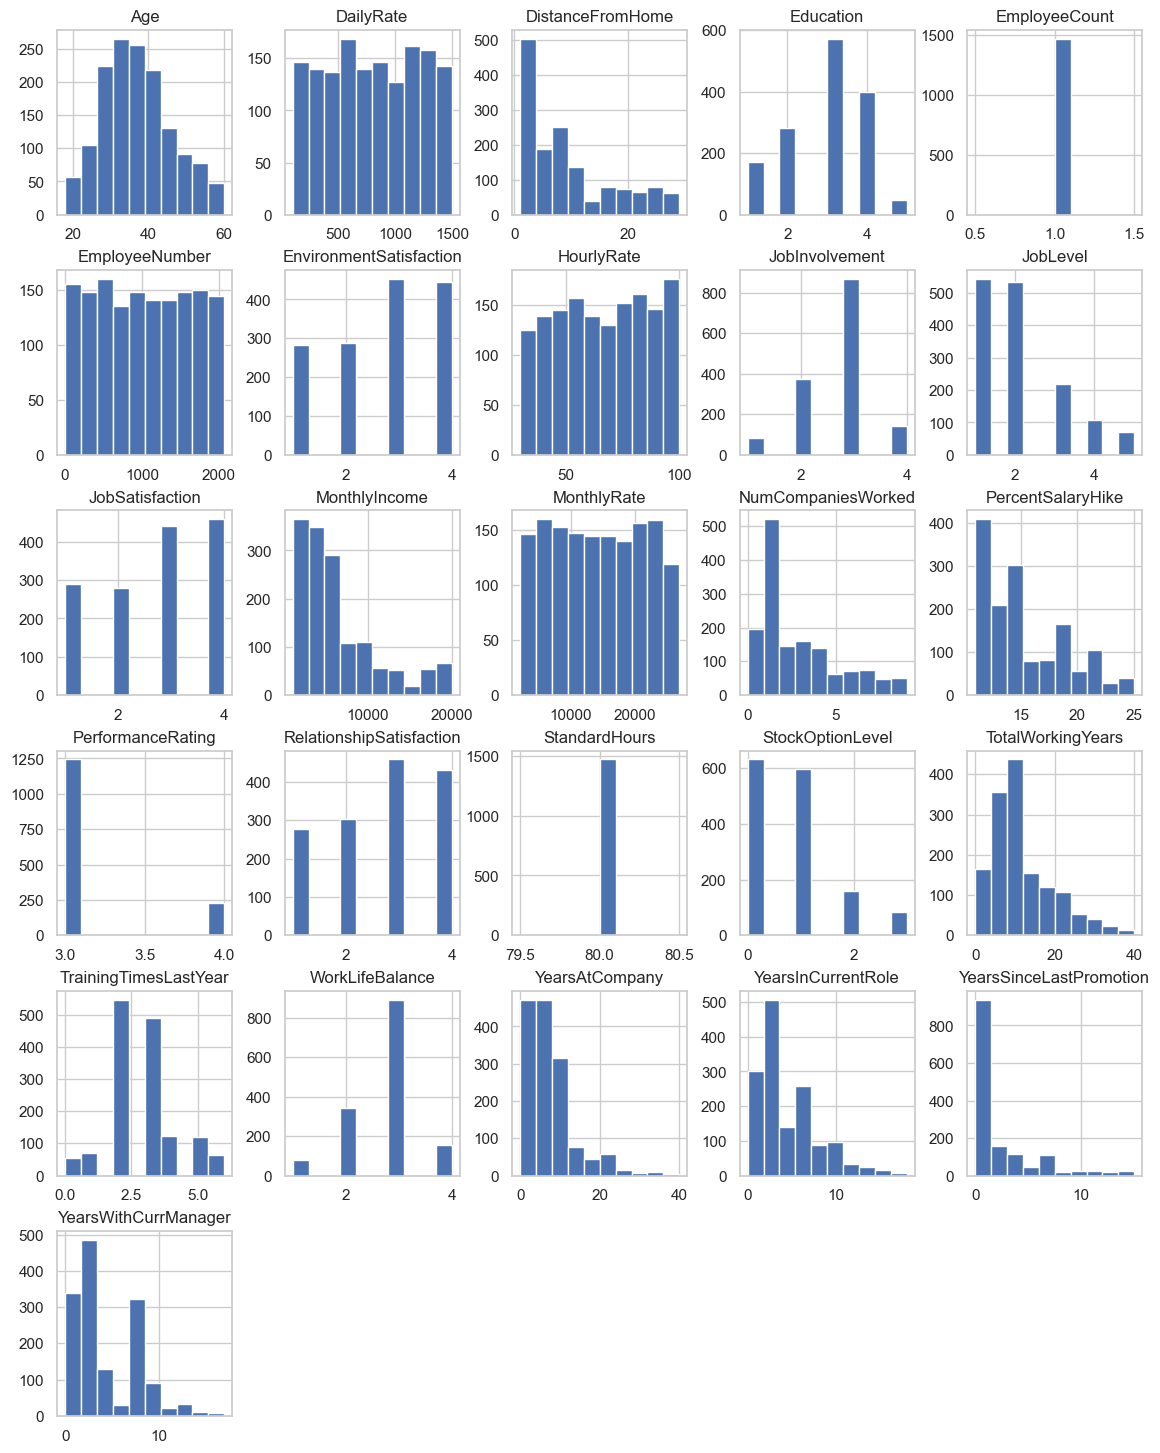

In [28]:
attrition_df.hist(figsize=(14,18));

**Findings:**

- Many numeric columns are right-skewed (e.g., `MonthlyIncome`, `YearsAtCompany`, `YearsWithCurrManager`).
- Satisfaction-related columns (`JobSatisfaction`, `EnvironmentSatisfaction`, etc.) tend to be concentrated around higher ratings.
- A few columns such as `JobInvolvement` and `WorkLifeBalance` are ordinal and evenly distributed, which aligns with expected HR rating scales.
- Flat distributions in columns like `MonthlyRate` and `EmployeeNumber` indicate limited usefulness for modeling.

#### 3.2.6 Outlier Detection

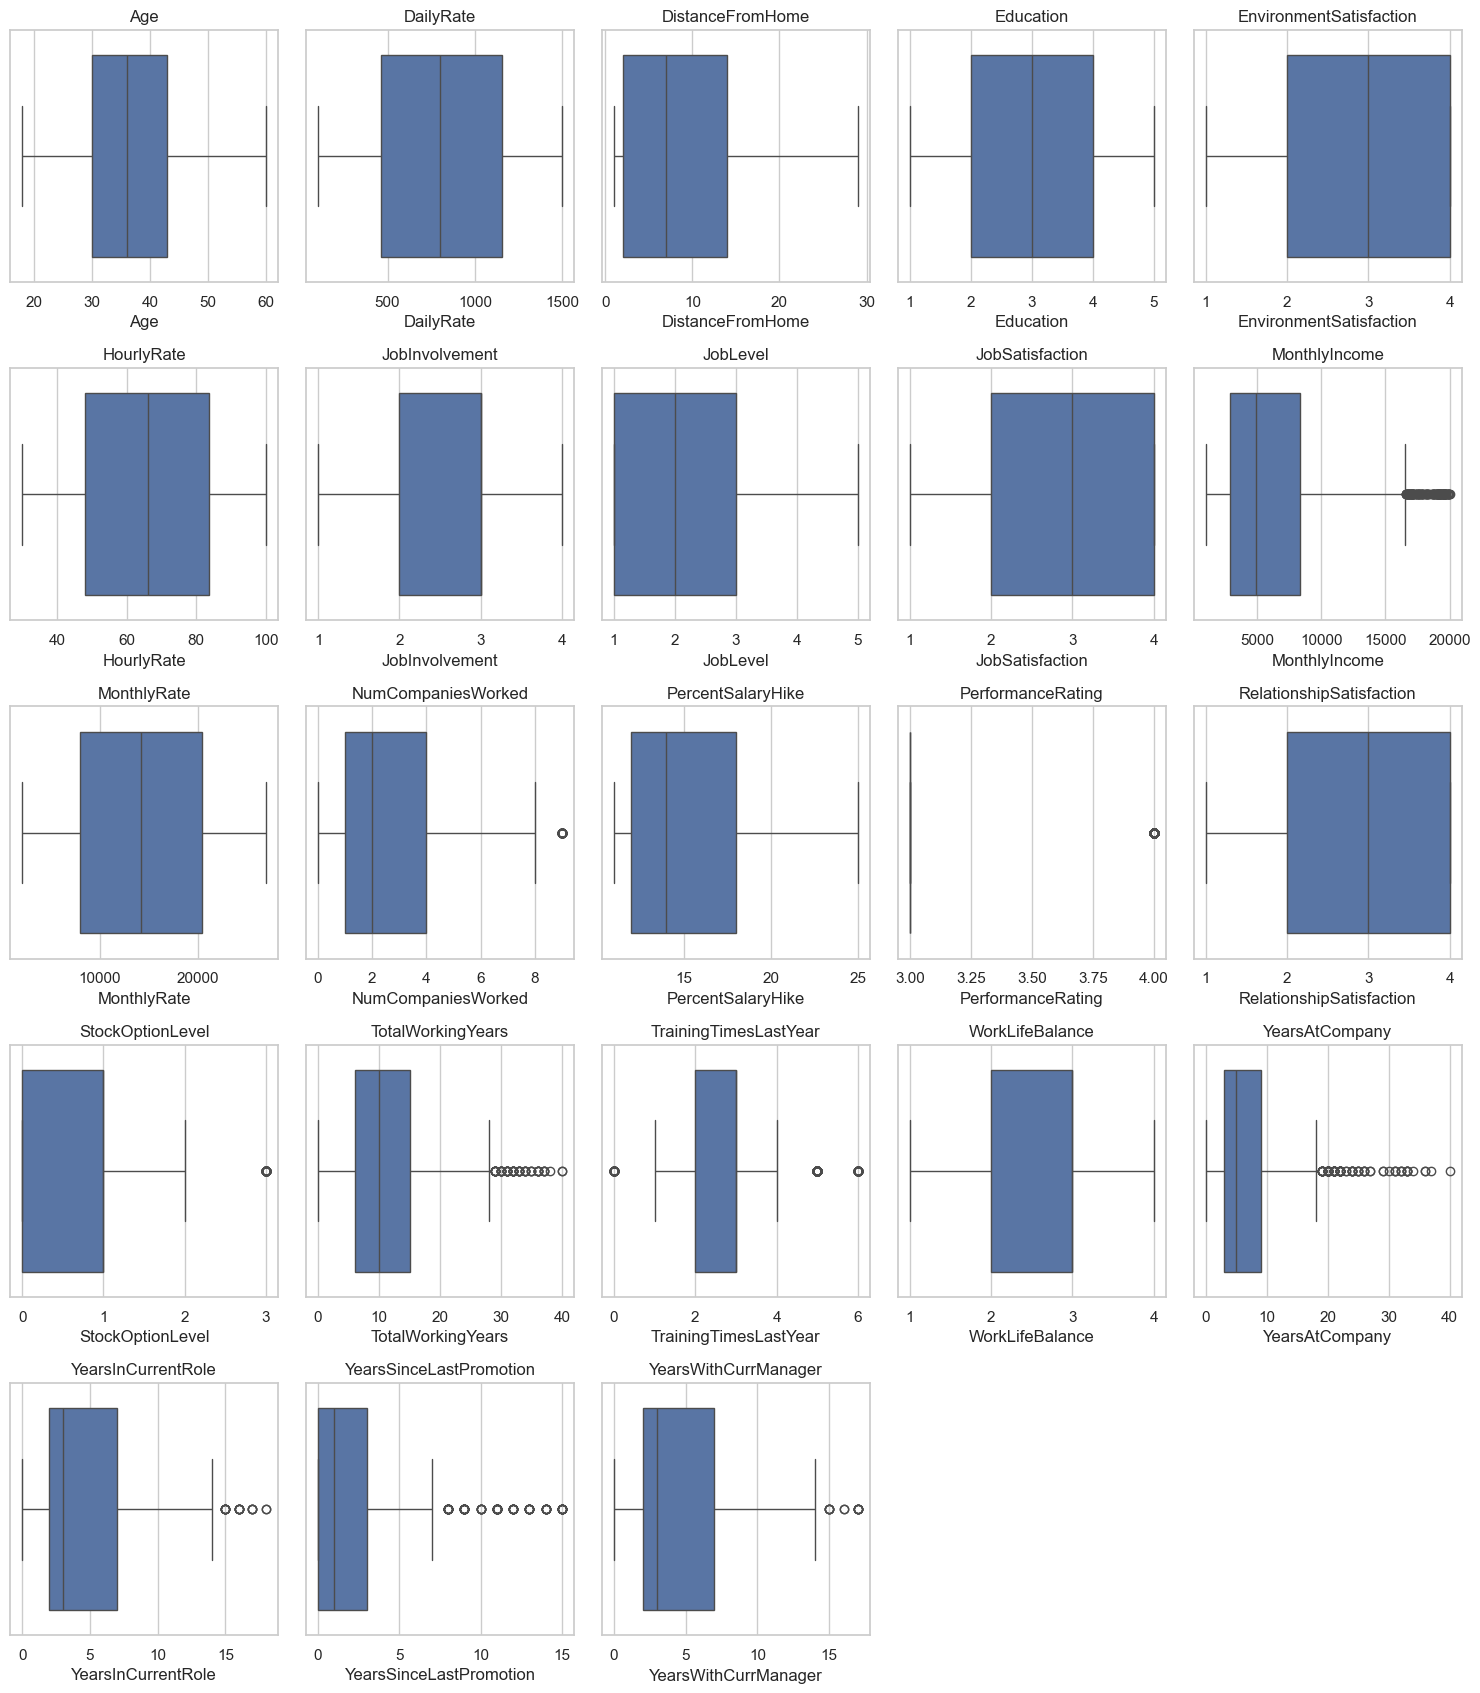

In [42]:
# Identify numeric columns (excluding those with very low variance or known categorical scale)
numerical_cols = attrition_df.select_dtypes(include=['int64', 'float64']).columns
exclude_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Create boxplots
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=attrition_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Boxplot Findings:

The following columns contain visible outliers according to boxplot visualizations:  
**MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager.**

Among these, the following had a **notably higher concentration of outliers**:
- **MonthlyIncome**
- **TotalWorkingYears**
- **YearsAtCompany**

These outliers likely represent higher earners and more experienced individuals. Removing these points could introduce bias by under-representing senior employees or those with longer tenure. For now, these values will be **retained**, but we will consider them during modeling and may perform sensitivity testing if needed.

## Summary and Action Plan

The dataset appears to be clean and well-structured, with no missing or duplicate values.

**Key findings:**
- All columns are fully populated.
- Several features such as `EmployeeCount`, `Over18`, and `StandardHours` contain only one unique value and will be removed.
- `EmployeeNumber` serves as a unique identifier and will also be removed from modeling.
- Many categorical features are stored as `object` dtype and will require encoding.
- Multiple numeric features exhibit right-skewed distributions and outliers, particularly `MonthlyIncome`, `YearsAtCompany`, and `TotalWorkingYears`. These will be monitored for impact during modeling.
- The target variable `Attrition` is currently a string (`Yes`/`No`) and will need to be encoded to binary.

---

### Next Step: Data Cleaning, Preprocessing, and Feature Engineering
In the next section, we will:
- Drop irrelevant or uninformative columns
- Encode categorical variables
- Standardize or normalize numeric variables as needed
- Split the dataset into features and target

## 4. Data Cleaning, Preprocessing, and Feature Engineering

In this section, we will clean and prepare the dataset for analysis and modeling. Based on our earlier exploration, the dataset is generally well-maintained, but there are still a few necessary preprocessing steps to ensure accuracy and compatibility with machine learning algorithms.

Our goals in this section are to:
- Drop irrelevant or uninformative features (e.g., unique IDs, constant columns)
- Encode categorical variables into numerical format
- Scale numerical features where appropriate
- Prepare the feature matrix (`X`) and target variable (`y`) for modeling

By the end of this section, we will have a clean, machine-learning-ready dataset to use in exploratory analysis, statistical testing, and predictive modeling.

### 4.1 Drop Irrelevant Columns/Features

In [4]:
# Make a copy of the raw dataset for cleaning
cleaning_df = attrition_df.copy()

# Columns with a single unique value or no predictive value
features_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

# Drop identified features
cleaning_df.drop(columns=features_to_drop, inplace=True)

# Confirm removal
print(f"Dropped columns: {features_to_drop}")
print(f"Remaining columns: {cleaning_df.shape[1]}")

Dropped columns: ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
Remaining columns: 31


### 4.2 Encoding Categorical Columns/Features

#### 4.2.1 Handling Binary Features

In [5]:
# Binary Categorical Columns
binary_cat_cols = ['Attrition', 'Gender', 'OverTime']

# Replace Binary Features
binary_mappings = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'OverTime': {'No': 0, 'Yes': 1}
}
# Apply mapping to rename feature values to (0, 1)
for col, mapping in binary_mappings.items():
    cleaning_df[col] = cleaning_df[col].map(mapping)

#### 4.2.2 Handling Multi-Level Features

In [6]:
# Multi-Level Categorical Columns
multi_cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

numeric_categoricals = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'
]

multi_cat_cols.extend(numeric_categoricals)

# Define value mappings for numeric categorical columns
value_mappings = {
    'Education': {
        1: 'Below_College',
        2: 'College',
        3: 'Bachelor',
        4: 'Master',
        5: 'Doctor'
    },
    'EnvironmentSatisfaction': {
        1: 'Low',
        2: 'Medium',
        3: 'High',
        4: 'Very_High'
    },
    'JobInvolvement': {
        1: 'Low',
        2: 'Medium',
        3: 'High',
        4: 'Very_High'
    },
    'JobSatisfaction': {
        1: 'Low',
        2: 'Medium',
        3: 'High',
        4: 'Very_High'
    },
    'PerformanceRating': {
        1: 'Low',
        2: 'Good',
        3: 'Excellent',
        4: 'Outstanding'
    },
    'RelationshipSatisfaction': {
        1: 'Low',
        2: 'Medium',
        3: 'High',
        4: 'Very_High'
    },
    'WorkLifeBalance': {
        1: 'Bad',
        2: 'Good',
        3: 'Better',
        4: 'Best'
    }
}

# Apply mappings to rename numeric categories before encoding
for col, mapping in value_mappings.items():
    cleaning_df[col] = cleaning_df[col].map(mapping)

# Create eda dataframe
eda_df = cleaning_df.copy()

# One-Hot Encode categorical columns
cleaning_df = pd.get_dummies(cleaning_df, columns=multi_cat_cols, drop_first=True)

print(f"Encoded Columns: {multi_cat_cols} ")
print(f"Columns After One-Hot Encoding: {cleaning_df.shape[1]}")

Encoded Columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'] 
Columns After One-Hot Encoding: 58


In [7]:
# Convert all bool columns to int
bool_cols = cleaning_df.select_dtypes(include='bool').columns
cleaning_df[bool_cols] = cleaning_df[bool_cols].astype(int)

In [8]:
# Encoding check
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   Attrition                           1470 non-null   int64
 2   DailyRate                           1470 non-null   int64
 3   DistanceFromHome                    1470 non-null   int64
 4   Gender                              1470 non-null   int64
 5   HourlyRate                          1470 non-null   int64
 6   JobLevel                            1470 non-null   int64
 7   MonthlyIncome                       1470 non-null   int64
 8   MonthlyRate                         1470 non-null   int64
 9   NumCompaniesWorked                  1470 non-null   int64
 10  OverTime                            1470 non-null   int64
 11  PercentSalaryHike                   1470 non-null   int64
 12  StockO

### 4.3 Feature Engineering

In this section, we perform feature engineering to improve the dataset's interpretability and modeling effectiveness.

During initial exploration, we identified three features—`HourlyRate`, `DailyRate`, and `MonthlyRate`—that are ambiguous in meaning and likely derived from or related to salary components. However, due to the lack of information about actual work hours, these "rate" columns may be misleading or introduce noise into the analysis.

Instead, we will retain `MonthlyIncome` as the core compensation variable, and create two new features: `AnnualIncome` and `WeeklyIncome`, which are more intuitive for downstream interpretation. These are linear transformations of `MonthlyIncome` and may aid in readability and visualization.

We will also drop the ambiguous rate columns.

In [9]:
# Inspect compensation-related features
cleaning_df[['DailyRate', 'HourlyRate','MonthlyRate', 'MonthlyIncome','OverTime']].head()

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,OverTime
0,1102,94,19479,5993,1
1,279,61,24907,5130,0
2,1373,92,2396,2090,1
3,1392,56,23159,2909,1
4,591,40,16632,3468,0


The above table shows that there isn't a clear interpretable relationship between the rates, income, and overtime values. Especially considering the `StandardHours` column only contained 40 hours, we don't have the true number of hours an employee worked to potentially derive the relationship. Thus, as mentioned above, we will drop the rate features and use `MonthlyIncome`.

In [10]:
# Drop ambiguous and potentially misleading salary rate columns
rate_cols_to_drop = ['HourlyRate', 'DailyRate', 'MonthlyRate']
cleaning_df.drop(rate_cols_to_drop, axis=1, inplace=True)

# Confirm removal
print(f"Dropped rate columns: {rate_cols_to_drop}")

Dropped rate columns: ['HourlyRate', 'DailyRate', 'MonthlyRate']


In [11]:
# Create derived income-based features for interpretability
cleaning_df['AnnualIncome'] = cleaning_df['MonthlyIncome'] * 12
cleaning_df['WeeklyIncome'] = cleaning_df['AnnualIncome'] / 52

# Preview the new features
cleaning_df[['MonthlyIncome', 'AnnualIncome', 'WeeklyIncome']].head()

,MonthlyIncome,AnnualIncome,WeeklyIncome
0,5993,71916,1383.000000
1,5130,61560,1183.846154
2,2090,25080,482.307692
3,2909,34908,671.307692
4,3468,41616,800.307692


### 4.4 Feature Scaling

To prepare the dataset for modeling, especially for algorithms like logistic regression, we scaled all continuous numeric features using **StandardScaler**. This transformation ensures that all scaled variables have a mean of 0 and a standard deviation of 1, which helps many machine learning algorithms converge more efficiently and reduces bias caused by differences in scale.

Binary and one-hot encoded categorical features were left unscaled.

In [12]:
# Define columns to scale (continuous numerical variables)
scale_cols = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager', 'AnnualIncome', 'WeeklyIncome'
]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform selected columns
cleaning_df[scale_cols] = scaler.fit_transform(cleaning_df[scale_cols])

# Confirm scaling (mean ~ 0, std ~ 1)
cleaning_df[scale_cols].describe().T[['mean', 'std']]

,mean,std
Age,-3.504377e-17,1.00034
DistanceFromHome,4.350262e-17,1.00034
MonthlyIncome,-4.471102e-17,1.00034
NumCompaniesWorked,1.450087e-17,1.00034
PercentSalaryHike,2.271803e-16,1.00034
TotalWorkingYears,-1.208406e-18,1.00034
TrainingTimesLastYear,8.700523e-17,1.00034
YearsAtCompany,-3.021015e-17,1.00034
YearsInCurrentRole,9.063045e-17,1.00034
YearsSinceLastPromotion,1.208406e-18,1.00034


In [13]:
cleaning_df[scale_cols].head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AnnualIncome,WeeklyIncome
0,0.446350,-1.010909,-0.108350,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,-0.108350,-0.108350
1,1.322365,-0.147150,-0.291719,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,-0.291719,-0.291719
2,0.008343,-0.887515,-0.937654,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,-0.937654,-0.937654
3,-0.429664,-0.764121,-0.763634,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,-0.763634,-0.763634
4,-1.086676,-0.887515,-0.644858,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,-0.644858,-0.644858


#### Summary: Feature Scaling

- A total of 13 continuous numerical features were scaled using **StandardScaler**.
- Each feature was transformed to have a mean of approximately 0 and a standard deviation of 1.
- This standardization helps improve the performance and stability of machine learning algorithms that are sensitive to the scale of input features (e.g., logistic regression).
- Binary and one-hot encoded categorical features were left untouched, as they already fall within a normalized 0–1 range.
- Sample output confirmed the scaling worked as intended, with normalized values visible in the first few rows.


### 4.5 Split Data

In [14]:
### Train-Test Feature and Target Split

# Define target variable
y = cleaning_df['Attrition']

# Define feature matrix (drop the target)
X = cleaning_df.drop('Attrition', axis=1)

# Confirm shapes
print(f"Feature Matrix (X) shape: {X.shape}")
print(f"Target Vector (y) shape: {y.shape}")

Feature Matrix (X) shape: (1470, 56)
Target Vector (y) shape: (1470,)


### Summary: Data Cleaning, Preprocessing, and Feature Engineering

In this section, we prepared the dataset for analysis and modeling by performing several critical preprocessing steps:

- **Dropped Irrelevant Columns:** Removed features such as `EmployeeCount`, `Over18`, `StandardHours`, and `EmployeeNumber` due to lack of variability or predictive value.
  
- **Encoded Categorical Variables:** 
  - Binary features (`Attrition`, `Gender`, `OverTime`) were mapped to 0/1.
  - Multi-level and numeric categorical features (e.g., `Education`, `JobRole`, `WorkLifeBalance`) were mapped to descriptive labels and then one-hot encoded using `pd.get_dummies()`.

- **Feature Engineering:**
  - Dropped ambiguous compensation-related features (`HourlyRate`, `DailyRate`, `MonthlyRate`).
  - Created interpretable salary features: `AnnualIncome` and `WeeklyIncome`.

- **Feature Scaling:** 
  - Applied `StandardScaler` to continuous numerical variables to normalize ranges for logistic regression and other models.
  - Left binary and one-hot encoded categorical variables unscaled.

- **Train-Test Preparation:**
  - Finalized the feature matrix `X` and target vector `y` for downstream statistical testing and modeling.

This cleaned dataset is now well-structured, fully numeric, and modeling-ready. In the next section, we will begin **Exploratory Data Analysis (EDA)** to uncover patterns and relationships between features and attrition — particularly with variables like job satisfaction, overtime, and compensation.


## 5. Exploratory Data Analysis (EDA)

In this section, we will conduct exploratory data analysis (EDA) to uncover patterns and trends related to employee attrition. This step is critical for identifying which features may be most influential in determining whether an employee is likely to leave the organization.

We will structure our EDA into four key parts:

1. **Understand the Distribution of the Target Variable**
   - Assess the class balance of the `Attrition` variable (Yes vs. No)
   - Determine whether the dataset is imbalanced

2. **Visualize Relationships Between Attrition and Key Features**
   - Explore how categorical features like `OverTime`, `JobRole`, `MaritalStatus`, and satisfaction-related variables relate to attrition

3. **Compare Distributions of Continuous Features by Attrition Status**
   - Use KDE plots to examine how features such as `MonthlyIncome`, `TotalWorkingYears`, and `YearsAtCompany` differ between attrited and non-attrited employees

4. **Identify Notable Patterns or Correlations**
   - Use correlation matrices and heatmaps to uncover relationships between numerical variables
   - Spot multicollinearity or clusters of related features

Insights from this section will directly influence our approach to statistical testing and model development in the next phases of the project.

In [31]:
# Align eda_df to more closely resemble finalized X feature matrix

# Drop rate columns
eda_df.drop(rate_cols_to_drop, axis=1, inplace=True)

# Create derived income-based features for interpretability
eda_df['AnnualIncome'] = eda_df['MonthlyIncome'] * 12
eda_df['WeeklyIncome'] = eda_df['AnnualIncome'] / 52

### 5.1 Distribution of the Target Variable

In [15]:
# Value counts (raw and normalized)
attrition_counts = y.value_counts()
attrition_percent = y.value_counts(normalize=True) * 100

print("Attrition Counts:")
print(attrition_counts)
print("\nAttrition Percentages:")
print(attrition_percent.round(2))

Attrition Counts:
Attrition
0    1233
1     237
Name: count, dtype: int64

Attrition Percentages:
Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


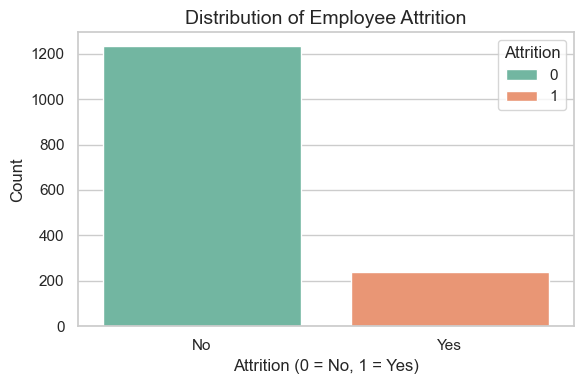

In [16]:
# Plot
plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette='Set2')
plt.title("Distribution of Employee Attrition", fontsize=14)
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()

#### Findings:

- The dataset contains a total of **1,470 employees**, of which:
  - **Approximately 16%** have left the company (`Attrition = 1`)
  - **Approximately 84%** have remained (`Attrition = 0`)
- This confirms that the dataset is **imbalanced**, with significantly more non-attrited than attrited employees.
- This imbalance will be taken into account during modeling through techniques like **stratified splitting** and possibly **resampling (e.g., SMOTE)** to avoid bias in model performance.

### 5.2 Attrition vs. Key Categorical Features

In [20]:
# Create Function to plot relationship between cat features and attrition rate
def plot_attrition_rate(df, category_col, figsize=(8, 4)):
    """
    Plots the average attrition rate for each category in a given column.
    Expects Attrition to be numeric (0/1) and category_col to be strings.
    """
    plt.figure(figsize=figsize)
    attrition_means = df.groupby(category_col)['Attrition'].mean().sort_values(ascending=False)

    sns.barplot(
        x=attrition_means.index,
        y=attrition_means.values,
        hue=attrition_means.index,
        palette='Set2'
    )

    plt.ylabel('Attrition Rate')
    plt.title(f'Attrition Rate by {category_col}', fontsize=13)
    plt.ylim(0, 0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

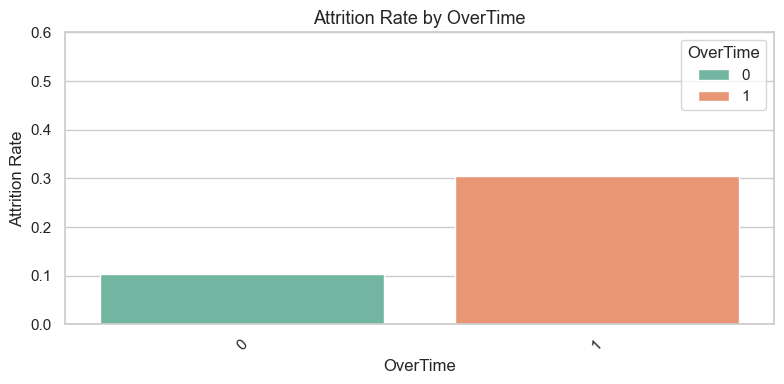

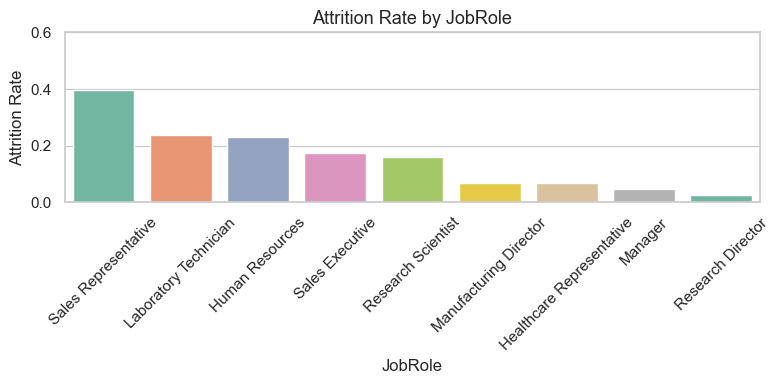

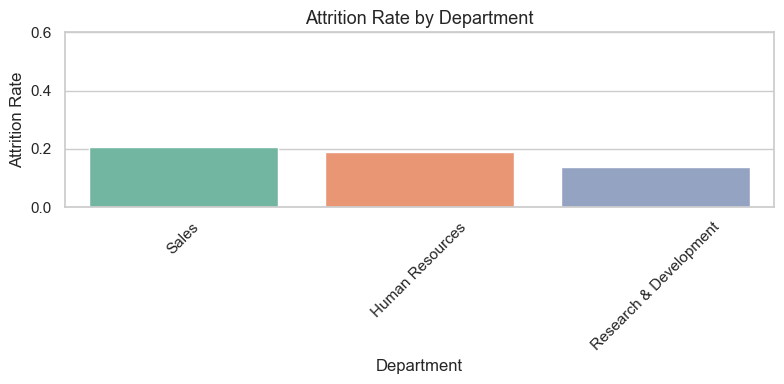

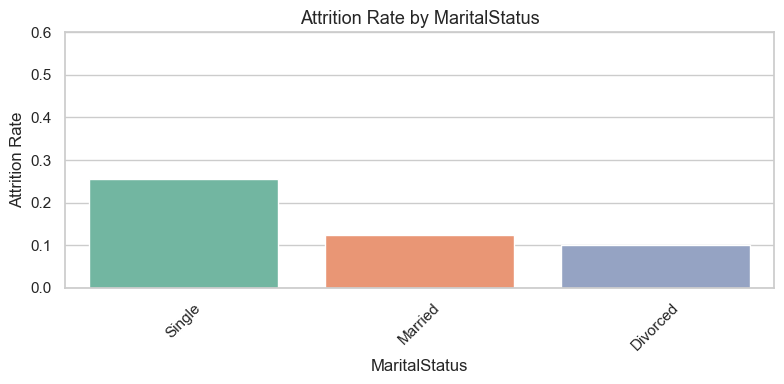

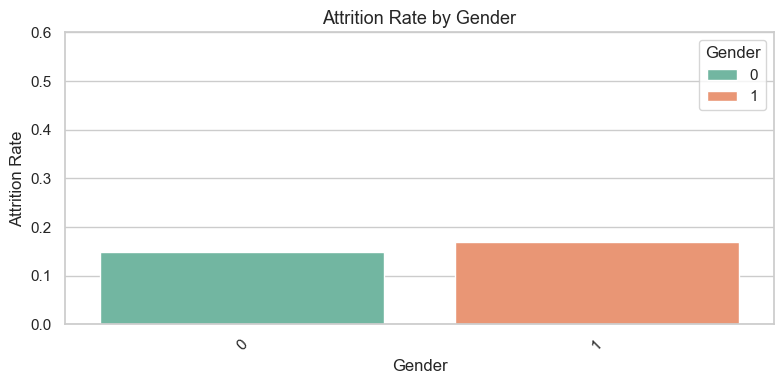

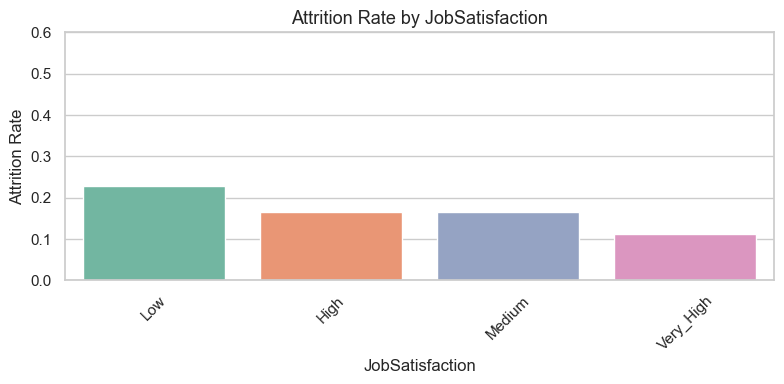

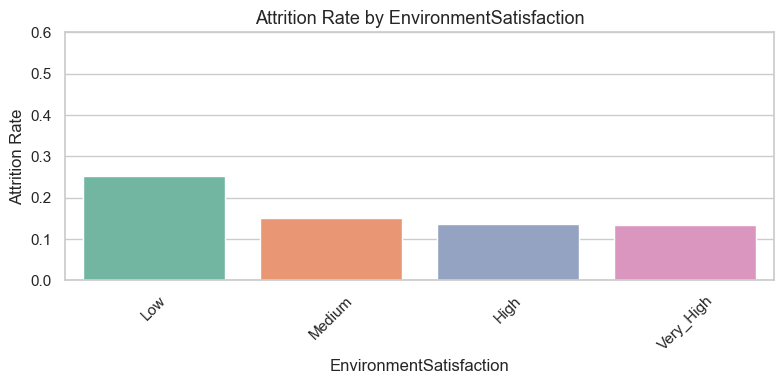

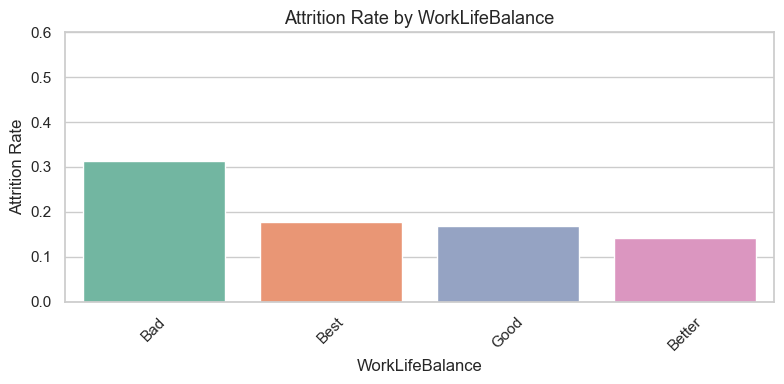

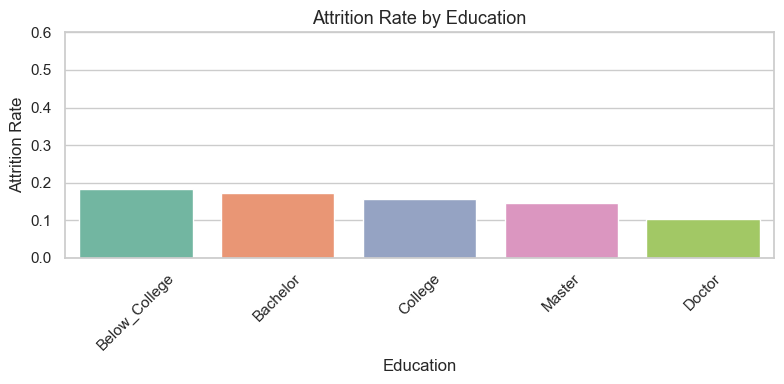

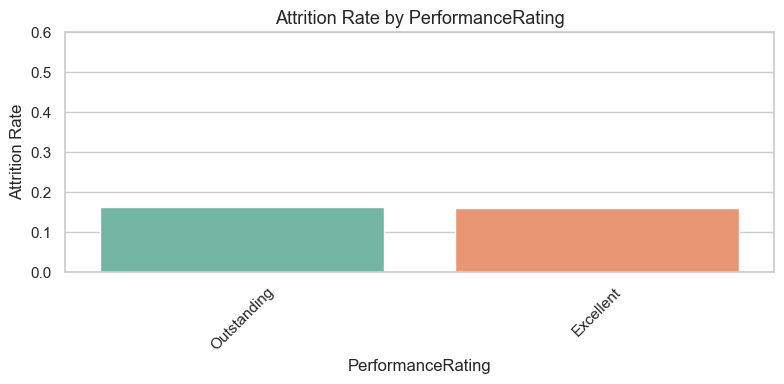

In [21]:
cat_features_to_plot = [
    'OverTime',
    'JobRole',
    'Department',
    'MaritalStatus',
    'Gender',
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'Education',
    'PerformanceRating'
]

for feature in cat_features_to_plot:
    plot_attrition_rate(eda_df, feature)

#### Findings:

- **OverTime:** Employees who worked overtime had an attrition rate of **30%**, compared to only **10%** for those who did not — a clear and impactful difference.
  
- **JobRole:** 
  - The highest attrition rates were seen in **Sales Representatives (~40%)**, **Laboratory Technicians (~22%)**, and **Human Resources (~21%)**.
  - Leadership and technical roles such as **Managers**, **Healthcare Reps**, and **Research Directors** showed very low attrition (~1–5%).

- **Department:** Employees in **Sales (20%)** and **Human Resources (19%)** experienced higher attrition than those in **Research & Development (15%)**.

- **MaritalStatus:** 
  - **Single employees** had the highest attrition rate at **25%**, compared to **12% (Married)** and **10% (Divorced)**.

- **Gender:** Slightly higher attrition among **males (~18%)** than **females (~15%)**, though not as pronounced as other factors.

- **Job Satisfaction:** 
  - Those with **Low satisfaction** had an attrition rate of **22%**, compared to only **11%** among those reporting **Very High satisfaction**.

- **Environment Satisfaction:** 
  - Attrition decreased steadily with satisfaction: **24% (Low)** to **~12.5% (Very High)**.

- **WorkLifeBalance:** 
  - Employees reporting a **Bad** work-life balance had an attrition rate of **31%**, nearly double that of those with **Better (14%)** or **Best (18%)** ratings.

- **Education:** A subtle trend shows decreasing attrition as education level increases, with **Below College (18.5%)** at the highest and **Doctorate (10%)** at the lowest.

- **PerformanceRating:** Little difference was observed between ratings: both **Outstanding** and **Excellent** had similar attrition rates (~16%).

These patterns highlight that **work stress, job satisfaction, and personal/lifestyle context (e.g., marital status, overtime)** are likely key factors in attrition decisions. These will guide feature selection and further statistical analysis in the next steps.


### 5.3 Distributions of Continuous Features by Attrition Status

In this step, we use KDE (Kernel Density Estimation) plots to compare the distributions of continuous features between employees who left (`Attrition = 1`) and those who stayed (`Attrition = 0`). This comparative visualization helps us detect subtle trends that might be associated with attrition behavior.

In [22]:
def plot_kde_by_attrition(df, column, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    sns.kdeplot(data=df, x=column, hue='Attrition', common_norm=False, fill=True, palette='Set2')
    plt.title(f'{column} Distribution by Attrition')
    plt.tight_layout()
    plt.show()

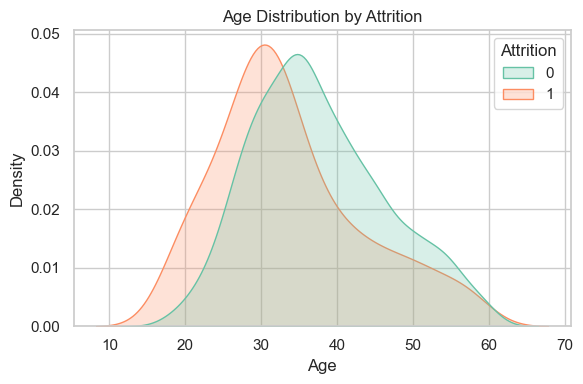

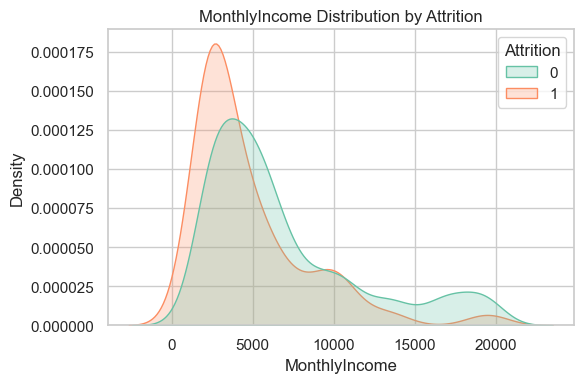

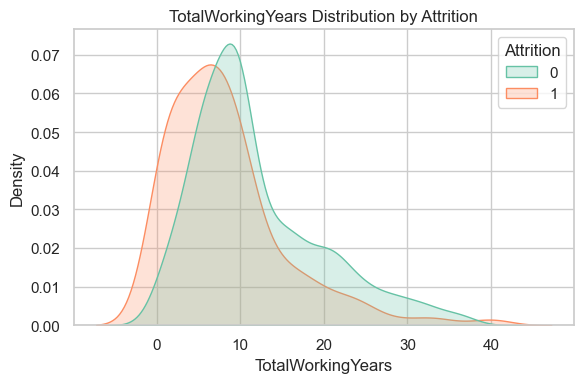

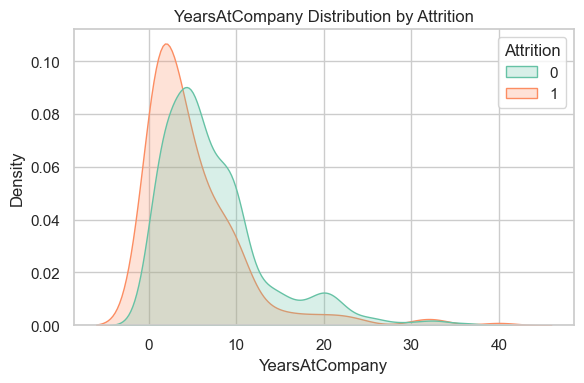

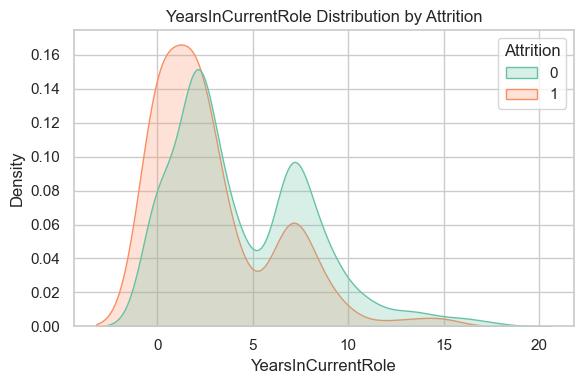

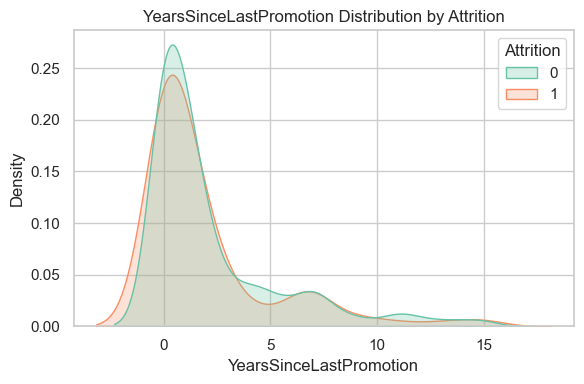

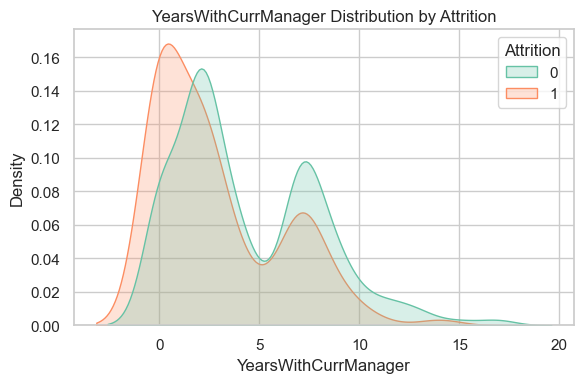

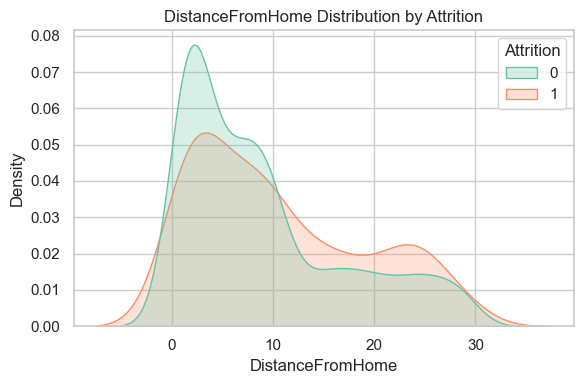

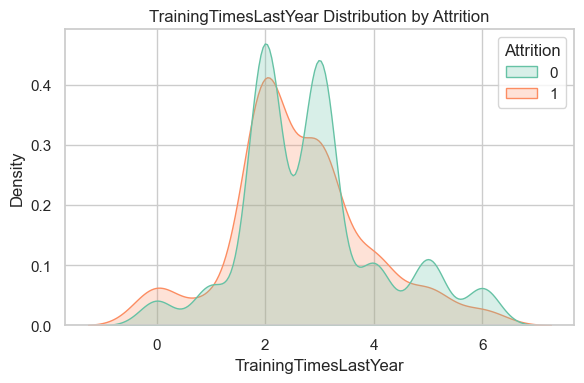

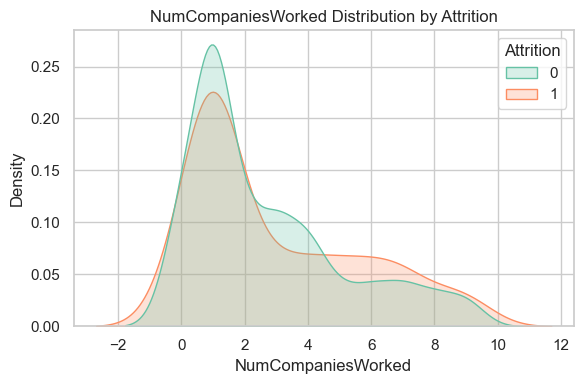

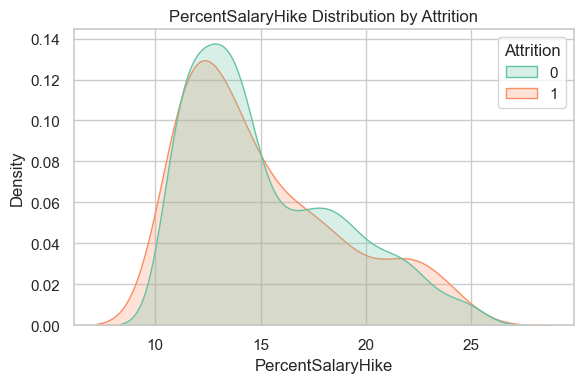

In [23]:
continuous_features = [
    'Age',
    'MonthlyIncome',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'DistanceFromHome',
    'TrainingTimesLastYear',
    'NumCompaniesWorked',
    'PercentSalaryHike',
]

for feature in continuous_features:
    plot_kde_by_attrition(eda_df, feature)

#### Key Observations:

- **Age:** Employees who left tend to be slightly younger, with a peak around 30–31 years versus 35–36 for those who stayed. The distribution for the attrited group is shifted slightly to the left.

- **MonthlyIncome:** Both groups are right-skewed, but the attrited group peaks more sharply around 2,500, while the non-attrited group has a flatter distribution peaking near 3,500–4,000. This may suggest a potential link between lower income and attrition.

- **TotalWorkingYears:** The attrited group shows a peak around 7 years of experience, while those who stayed peaked around 9 years.

- **YearsAtCompany:** Attrited employees are more concentrated in the early years (~2–3), while retained employees peaked around 4–5 years. This supports the idea that lower tenure is associated with higher attrition.

- **YearsInCurrentRole:** Both groups had peaks near 7 years, but the attrited group’s earlier peak was slightly lower (~1–2 years vs. 2–3 years for non-attrited), suggesting quicker exits from roles.

- **YearsSinceLastPromotion:** Distributions between both groups were very similar, with no strong visual separation, indicating promotion timing may not be a strong predictor of attrition on its own.

- **YearsWithCurrManager:** Mirrored the pattern seen in `YearsInCurrentRole` with dual peaks around 3 and 7 years. Slight differences in the early peak could suggest early dissatisfaction with management.

- **DistanceFromHome:** The attrited group showed a flatter distribution and more density in longer distances, whereas the non-attrited group had a sharper peak close to 0–5 miles. There may be a weak relationship between commute distance and attrition.

- **TrainingTimesLastYear:** No major visual difference, though the non-attrited group showed more variability in density peaks. Not enough evidence to suggest that training frequency alone impacts attrition.

- **NumCompaniesWorked:** A slight indication that employees who worked for more companies may be more likely to leave, but this trend wasn’t strongly pronounced.

- **PercentSalaryHike:** The distributions for both groups were very similar, suggesting this feature may not significantly influence attrition.

#### Summary:
Features such as **income, tenure, and age** show the most noticeable distribution differences between attrition groups. Others like `YearsSinceLastPromotion`, `TrainingTimesLastYear`, and `PercentSalaryHike` show little visual difference and may be weaker predictors.

These insights will guide our statistical testing and model input selection in the next phases.

### 5.4 Correlation Heatmap Analysis

To further explore the relationships between numeric variables, we compute a correlation matrix and visualize it using a heatmap. This analysis helps identify features that are strongly associated with attrition and may influence model behavior.

In [24]:
# Drop non-numerics
numeric_cols = eda_df.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_cols.corr()

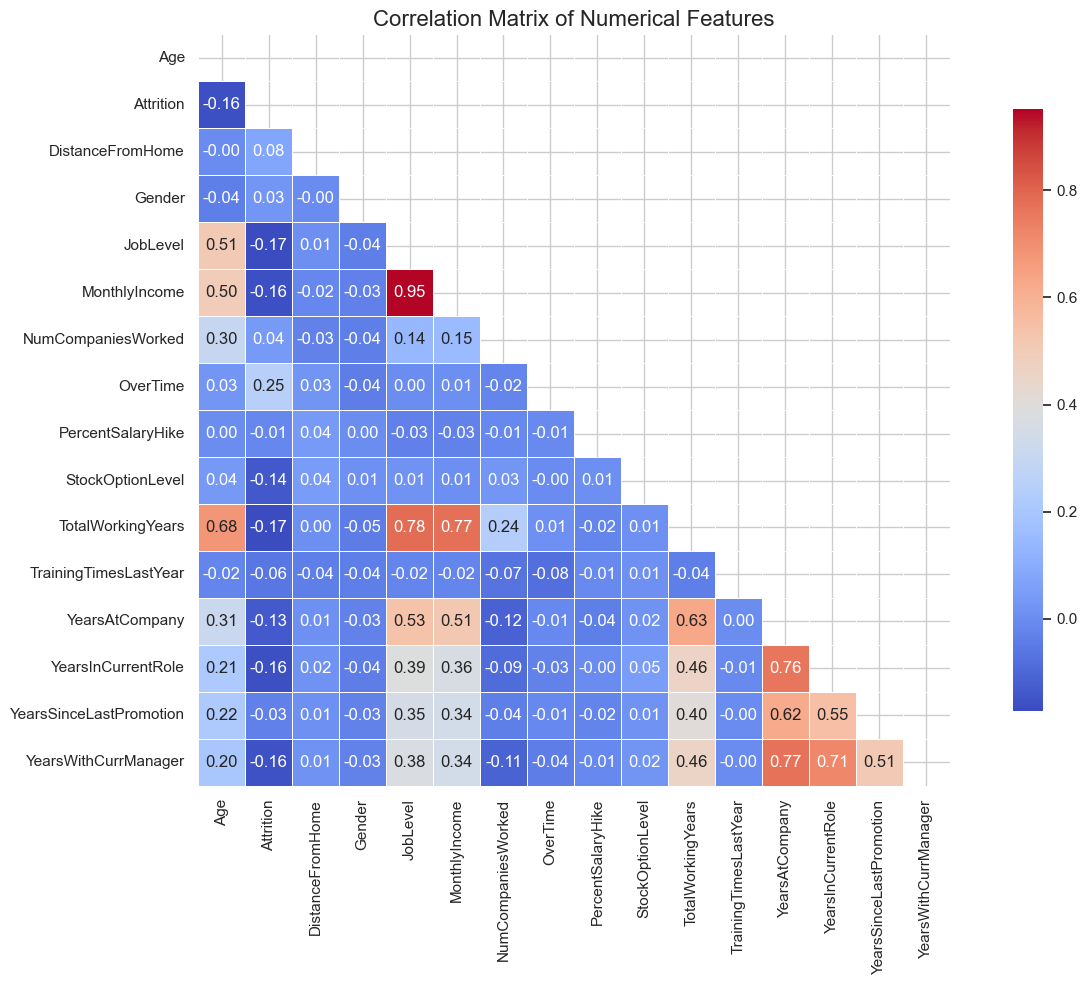

In [25]:
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))  # mask upper triangle
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Key Observations:

- **Attrition Correlations:**
  - `OverTime` showed the strongest positive correlation with attrition (~0.25), reinforcing earlier insights that overtime work is a risk factor.
  - `YearsAtCompany`, `TotalWorkingYears`, `YearsWithCurrManager`, and `YearsInCurrentRole` had the strongest negative correlations with attrition, suggesting employees with longer tenures are less likely to leave.
  - `MonthlyIncome` and `Age` were also mildly negatively correlated with attrition, indicating younger and lower-paid employees are at higher risk.

- **Multicollinearity Observed:**
  - `MonthlyIncome` and `JobLevel` were strongly correlated (> 0.9), which was expected since income increases with level.
  - `TotalWorkingYears` and `Age` were also highly correlated (~0.7), reflecting natural career progression.

This analysis supports earlier EDA insights and will help inform variable selection and statistical testing in the next sections.

## 5. Summary of Exploratory Data Analysis (EDA)

The exploratory data analysis phase provided several valuable insights into the factors influencing employee attrition.

- The **target variable (`Attrition`) is imbalanced**, with only ~16% of employees leaving the company. This imbalance will need to be accounted for in model evaluation and training.

- Categorical features like **OverTime**, **JobRole**, **MaritalStatus**, and **WorkLifeBalance** showed significant variation in attrition rates. Notably, employees working overtime, those in sales-oriented roles, and those reporting low satisfaction or poor work-life balance were more likely to leave.

- From the continuous features, we observed that employees who left were generally **younger, had less tenure, and earned lower income**. In contrast, features like `YearsSinceLastPromotion` and `TrainingTimesLastYear` showed no strong visual differences across attrition groups.

- The **correlation heatmap** reinforced these findings:
  - `OverTime` had the strongest positive correlation with attrition.
  - Features related to **experience and tenure** had the strongest negative correlations.
  - Multicollinearity was observed among income-related variables (`MonthlyIncome`, `AnnualIncome`, `JobLevel`), and between `Age` and `TotalWorkingYears`, which will be important to address during modeling.

These EDA findings will directly guide our approach in the next step, **statistical testing**, where we’ll formally evaluate the strength and significance of relationships between features and attrition using hypothesis testing and inferential methods.

## 6. Statistical Testing

In this section, we will apply formal statistical tests to determine whether the relationships observed during exploratory analysis are statistically significant. The goal is to move beyond visual patterns and assess which features have meaningful associations with employee attrition.

---

### Research Question

**Can employee attrition be accurately predicted using demographic, job satisfaction, and performance-related factors?**

---

### Hypotheses

- **H₀ (Null Hypothesis):** There is no significant relationship between employee attributes (e.g., job satisfaction, overtime, years at company) and the likelihood of attrition.  
- **H₁ (Alternative Hypothesis):** There is a significant relationship between employee attributes (e.g., job satisfaction, overtime, years at company) and the likelihood of attrition.

**Note:** All statistical tests in this section will be conducted as **two-tailed tests**. This allows us to detect whether there is any significant difference — either positive or negative — between groups or relationships without assuming the direction in advance.

---

### Methods and Approach

We will use a combination of hypothesis testing and inferential modeling to evaluate the relationship between features and attrition:

1. **Independent t-tests** will compare means of continuous features (e.g., Age, MonthlyIncome) between attrited and non-attrited employees.
2. **Chi-Squared tests of independence** will examine whether categorical variables (e.g., OverTime, Department) are associated with attrition.
3. **Logistic Regression (`Logit()` from `statsmodels`)** will model attrition as a binary outcome and allow us to evaluate the **simultaneous influence** of multiple features. This will also provide **p-values** and **confidence intervals** for each predictor.

---

### Why Use Logistic Regression?

Since our outcome variable `Attrition` is binary (Yes/No), logistic regression is the appropriate modeling choice. While the data encodes these values as `0` and `1`, they represent **categorical outcomes**, not continuous measurements — making linear regression unsuitable.

`Logit()` from `statsmodels` allows us to:

- Estimate the **effect size** of each predictor on the probability of attrition
- Compute **p-values** to assess the **statistical significance** of each variable
- Support hypothesis-driven feature selection before building full machine learning models

---

The combination of traditional statistical tests and logistic regression will provide both **univariate and multivariate perspectives** on the factors that contribute to employee attrition.

### 6.1 T-Tests for Continuous Features

To begin our statistical testing, we apply **independent t-tests** to the continuous variables in the dataset to determine whether there are statistically significant differences in the means of these features between employees who left (`Attrition = 1`) and those who stayed (`Attrition = 0`).

The t-test is appropriate because:
- We are comparing the means of a continuous variable across two independent groups (attrited vs. non-attrited).
- Our null hypothesis (**H₀**) is that the population means are equal.
- Our alternative hypothesis (**H₁**) is that the population means are different.

We'll use `scipy.stats.ttest_ind()` with the `equal_var=False` argument (Welch's t-test), which is more robust in the presence of unequal variances or sample sizes.

**Tools Used:**
- `scipy.stats.ttest_ind` from the `scipy` library
- `eda_df` DataFrame (unscaled, interpretable continuous features)

**Significance Level:**  
- We'll use an alpha (𝛼) of **0.05**. A p-value below this threshold indicates a statistically significant difference between groups.

In [36]:
# Identify continuous variables for testing (excluding 'Attrition' and categorical variables)
continuous_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
    'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'AnnualIncome', 'WeeklyIncome'
]

# Split data by attrition status
attrited = eda_df[eda_df['Attrition'] == 1]
non_attrited = eda_df[eda_df['Attrition'] == 0]

# Run t-tests and store results
t_test_results = []

for feature in continuous_features:
    t_stat, p_val = stats.ttest_ind(attrited[feature], non_attrited[feature], equal_var=False)
    t_test_results.append({
        'Feature': feature,
        'T-Statistic': t_stat,
        'P-Value': p_val,
        'Significant': p_val < 0.05
    })

t_test_df = pd.DataFrame(t_test_results)
t_test_df.sort_values(by='P-Value', inplace=True)

In [39]:
# View Results
t_test_df

,Feature,T-Statistic,P-Value,Significant
12,AnnualIncome,-7.482622,4.433589e-13,True
2,MonthlyIncome,-7.482622,4.433589e-13,True
13,WeeklyIncome,-7.482622,4.433589e-13,True
6,TotalWorkingYears,-7.019179,1.159817e-11,True
9,YearsInCurrentRole,-6.847079,3.187390e-11,True
11,YearsWithCurrManager,-6.633399,1.185022e-10,True
0,Age,-5.828012,1.379760e-08,True
8,YearsAtCompany,-5.282596,2.285905e-07,True
5,StockOptionLevel,-5.244221,2.811541e-07,True
1,DistanceFromHome,2.888183,4.136512e-03,True


#### T-Test Results: Continuous Features and Attrition

To determine which continuous features are statistically associated with employee attrition, we conducted independent two-sample t-tests comparing the means of employees who left the company (Attrition = 1) and those who stayed (Attrition = 0). A two-tailed test was used, consistent with our non-directional hypothesis.

**Key Findings:**

The following features showed statistically significant differences between the two groups (p < 0.05), indicating that their means vary based on attrition status:

- `AnnualIncome`, `MonthlyIncome`, `WeeklyIncome` — Strongly associated with attrition. Employees who left earned significantly less than those who stayed.

- `TotalWorkingYears` — Employees with more experience were less likely to leave.

- `YearsInCurrentRole`, `YearsWithCurrManager`, `YearsAtCompany` — All tenure-related variables show a meaningful negative relationship with attrition, suggesting those with longer company or role history are less likely to leave.

- `Age` — Attrited employees tended to be younger.

- `StockOptionLevel` — Higher levels of stock options appear to correlate with lower attrition.

- `DistanceFromHome` — Positively associated with attrition; employees who live farther away had higher attrition.

- `TrainingTimesLastYear` — Small but statistically significant difference, with those who left having slightly fewer training sessions.

The following features did not show statistically significant differences between groups:

- `NumCompaniesWorked`

- `YearsSinceLastPromotion`

- `PercentSalaryHike`

These findings reinforce earlier EDA insights: income, experience, age, and tenure-related features are highly relevant to attrition. In contrast, factors like number of previous employers or recent salary hikes do not show strong independent effects.

### 6.2 Chi-Square Tests on Categorical Features

To determine whether there are statistically significant associations between categorical features and employee attrition, we perform **Chi-Square tests of independence**.

The Chi-Square test helps us identify whether two categorical variables (e.g., Attrition and JobRole) are independent or related. A significant result (p < 0.05) indicates that the distribution of one variable is likely influenced by the other.

#### Why Chi-Square?
- Our **target variable `Attrition`** is categorical (Yes/No → 1/0).
- The following features are also categorical (nominal or ordinal) and, therefore, appropriate for this test:
  - BusinessTravel
  - Department
  - Education
  - EducationField
  - EnvironmentSatisfaction
  - JobInvolvement
  - JobRole
  - JobSatisfaction
  - MaritalStatus
  - PerformanceRating
  - RelationshipSatisfaction
  - WorkLifeBalance

We will use **scipy's `chi2_contingency()`** function to test independence between each of these features and `Attrition`.

In [40]:
# List of categorical columns to test against Attrition
categorical_features = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'PerformanceRating',
    'RelationshipSatisfaction', 'WorkLifeBalance'
]

chi2_results = []

for col in categorical_features:
    contingency = pd.crosstab(eda_df[col], eda_df['Attrition'])
    stat, p, dof, expected = stats.chi2_contingency(contingency)
    chi2_results.append({
        'Feature': col,
        'Chi2 Statistic': round(stat, 4),
        'P-Value': round(p, 5),
        'Significant': p < 0.05
    })

chi2_df = pd.DataFrame(chi2_results).sort_values(by='P-Value')

In [41]:
# View results
chi2_df

,Feature,Chi2 Statistic,P-Value,Significant
6,JobRole,86.1903,0.00000,True
5,JobInvolvement,28.4920,0.00000,True
8,MaritalStatus,46.1637,0.00000,True
0,BusinessTravel,24.1824,0.00001,True
4,EnvironmentSatisfaction,22.5039,0.00005,True
7,JobSatisfaction,17.5051,0.00056,True
11,WorkLifeBalance,16.3251,0.00097,True
1,Department,10.7960,0.00453,True
3,EducationField,16.0247,0.00677,True
10,RelationshipSatisfaction,5.2411,0.15497,False


#### Chi-Square Test Results: Categorical Features and Attrition

We performed **Chi-Square tests of independence** to examine whether various categorical features were significantly associated with employee attrition. The results are shown in the table above.

#### Key Findings:

The following features were found to have **statistically significant associations with attrition** (p < 0.05), indicating that their distributions differ meaningfully between employees who left and those who stayed:

- **JobRole** (p < 0.001): Strongest association; attrition rates vary widely across different roles.
- **JobInvolvement** (p < 0.001): Suggests that how engaged employees feel in their work is linked to attrition.
- **MaritalStatus** (p < 0.001): Single employees were more likely to leave compared to married or divorced individuals.
- **BusinessTravel** (p ≈ 0.00001): Frequency of business travel is associated with higher attrition.
- **EnvironmentSatisfaction** (p ≈ 0.00005): Lower satisfaction levels relate to higher attrition rates.
- **JobSatisfaction** (p ≈ 0.00056): Supports the idea that dissatisfaction at work increases the likelihood of attrition.
- **WorkLifeBalance** (p ≈ 0.00097): Imbalances in work-life conditions appear linked to voluntary exits.
- **Department** (p ≈ 0.0045): Attrition rates differ between Sales, HR, and R&D.
- **EducationField** (p ≈ 0.0068): Field of study may influence career trajectory and turnover tendencies.

The following features **did not show statistically significant associations with attrition**:

- **RelationshipSatisfaction** (p ≈ 0.155)
- **Education** (p ≈ 0.546)
- **PerformanceRating** (p ≈ 0.990)

These results reinforce our earlier EDA findings and highlight important categorical predictors for the next phase of analysis. In particular, features related to **satisfaction, involvement, and role characteristics** appear to play critical roles in employee retention.

### 6.3 Logistic Regression

To conclude our statistical testing section, we’ll perform a **logistic regression analysis** using the `Logit()` function from `statsmodels`. Logistic regression is ideal here because our target variable (`Attrition`) is binary (1 = employee left, 0 = employee stayed), making this a classification problem.

While we will later build predictive models using `scikit-learn`, `statsmodels` allows us to:
- Examine **statistical significance** of each predictor via **p-values**
- Interpret **coefficients** to understand how each feature influences the log-odds of attrition
- Support our hypothesis testing by identifying which features have meaningful relationships with attrition

We’ll use the final cleaned and encoded feature matrix `X` and the label vector `y`. Before fitting the model, we’ll also add a constant column to `X` using `sm.add_constant()` to include an intercept term in the regression model.

#### Split Features into Logical Groups to make sure that Logit() converges

In [70]:
# Group 1: Demographic and basic job info
group_1 = [
    'Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
    'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel'
]

# Group 2: Tenure-related features
group_2 = [
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Group 3: Overtime and BusinessTravel
group_3 = [
    'OverTime', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely'
]

# Group 4: Department and EducationField
group_4 = [
    'Department_Research & Development', 'Department_Sales',
    'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical',
    'EducationField_Other', 'EducationField_Technical Degree'
]

# Group 5: JobRole
group_5 = [col for col in X.columns if col.startswith('JobRole_')]

# Group 6: Satisfaction and Balance Ratings
group_6 = [
    'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very_High',
    'JobInvolvement_Low', 'JobInvolvement_Medium', 'JobInvolvement_Very_High',
    'JobSatisfaction_Low', 'JobSatisfaction_Medium', 'JobSatisfaction_Very_High',
    'RelationshipSatisfaction_Low', 'RelationshipSatisfaction_Medium', 'RelationshipSatisfaction_Very_High',
    'WorkLifeBalance_Best', 'WorkLifeBalance_Better', 'WorkLifeBalance_Good'
]

# Group 7: Marital Status, Education, Performance
group_7 = [
    'MaritalStatus_Married', 'MaritalStatus_Single',
    'Education_Below_College', 'Education_College', 'Education_Doctor', 'Education_Master',
    'PerformanceRating_Outstanding'
]

In [71]:
# Combine Groups
groups = [group_1, group_2, group_3, group_4, group_5, group_6, group_7]

# Perform Logistic Regression on each group
for i, features in enumerate(groups, start=1):
    print(f"\n===== Logistic Regression: Group {i} =====")
    X_subset = X[features]
    X_const = sm.add_constant(X_subset)
    
    logit_model = sm.Logit(y, X_const)
    try:
        result = logit_model.fit(disp=0)
        print(result.summary())
    except Exception as e:
        print(f"⚠️ Model for Group {i} did not converge or raised an error: {e}")


===== Logistic Regression: Group 1 =====
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1461
Method:                           MLE   Df Model:                            8
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                 0.08992
Time:                        00:30:49   Log-Likelihood:                -590.91
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.539e-21
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8840      0.481     -1.839      0.066      -1.826       0.058
Age                   -0.3523      0.093     -3.787      0.000   

#### Finalize Logistic Regression Model from Features Identified in Each Group

In [73]:
from statsmodels.tools.sm_exceptions import PerfectSeparationError
# Final selected features based on prior EDA and statistical tests
final_features = [
    # Demographics
    'Age', 'DistanceFromHome', 'NumCompaniesWorked', 'StockOptionLevel',
    
    # Tenure/Experience
    'TotalWorkingYears', 'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    
    # Work Conditions
    'OverTime', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
    
    # Job Role
    'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'JobRole_Human Resources',
    
    # Satisfaction
    'JobSatisfaction_Low', 'JobSatisfaction_Very_High',
    'EnvironmentSatisfaction_Low', 'WorkLifeBalance_Better',
    
    # Marital Status
    'MaritalStatus_Single'
]

# Subset X to include only final features
X_top = X[final_features]

# Add constant for intercept
X_top_const = sm.add_constant(X_top)

# Fit the model
try:
    final_logit_model = sm.Logit(y, X_top_const)
    final_logit_result = final_logit_model.fit()
except PerfectSeparationError:
    print("Perfect separation detected!")

# Display summary
print(final_logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.317885
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                           19
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.2803
Time:                        00:56:34   Log-Likelihood:                -467.29
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.297e-65
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.0100      0.434     -9.23

### Logistic Regression Results: Findings & Summary

We used **logistic regression** to model the likelihood of employee attrition based on various numerical and categorical features. Since our target variable (`Attrition`) is binary (0 = Stayed, 1 = Left), logistic regression is an ideal statistical tool to interpret both **predictive relationships** and **direction/magnitude** of impact for each feature.

---

#### Convergence Issues and Workaround

Initially, we attempted to fit a full logistic regression model using **all 56 features** in our cleaned and encoded feature matrix (`X`). However, the model failed to converge even with regularization and increased iteration limits. This is a common issue when:

- Multicollinearity exists between features (e.g., `JobLevel`, `MonthlyIncome`, `AnnualIncome`)
- Sparse or redundant dummy variables are present
- The number of predictors is large relative to signal strength

To address this, we broke the model into **smaller, logical feature groups** (demographics, tenure, job roles, satisfaction, etc.) and successfully fit **7 converged models**, each revealing important insights within their domain.

Finally, we synthesized those insights and built a **final reduced model** using only statistically significant or conceptually important features from earlier statistical tests (t-tests, chi-squared, and EDA). This model converged successfully.

---

#### Final Reduced Model: Key Findings

Our final logistic regression model achieved a **pseudo R² of 0.280**, indicating solid explanatory power given the binary nature of the outcome. The following variables were found to be statistically significant predictors of attrition:

##### **Positive Predictors (Increased Likelihood of Attrition):**
- `OverTime` (p < 0.001): Strongest predictor; employees working overtime are **much more likely** to leave.
- `BusinessTravel_Travel_Frequently` and `Travel_Rarely`: Higher attrition associated with frequent travel demands.
- `YearsSinceLastPromotion`: Longer gaps since promotion were linked to increased attrition.
- `JobRole_Sales Representative`, `Laboratory Technician`, `Human Resources`: These roles had significantly higher attrition odds compared to others.
- `EnvironmentSatisfaction_Low` and `JobSatisfaction_Low`: Dissatisfaction was clearly associated with higher attrition.
- `NumCompaniesWorked` and `DistanceFromHome`: May reflect instability and long commutes, respectively.
- `MaritalStatus_Single`: Singles had higher attrition odds, potentially reflecting lifestyle or mobility factors.

##### **Negative Predictors (Reduced Likelihood of Attrition):**
- `Age`, `TotalWorkingYears`, `YearsWithCurrManager`: More experienced and older employees were less likely to leave.
- `WorkLifeBalance_Better`: Better work-life balance was significantly protective.
- `JobSatisfaction_Very_High`: Strong satisfaction reduced the probability of leaving.

Some features (e.g., `MonthlyIncome`, `YearsAtCompany`, `StockOptionLevel`) were not significant in the final model, likely due to **overlap with more predictive variables** or **multicollinearity**.

---

#### Comparison to EDA & Statistical Testing

This model's results are **highly consistent** with our exploratory data analysis and statistical testing:

- Top predictors like `OverTime`, `Job Satisfaction`, `Environment Satisfaction`, and `YearsWithCurrManager` showed strong correlations in **EDA heatmaps**, **t-tests**, and **chi-squared tests**.
- Our final model supports the narrative that **job conditions, satisfaction, and personal/lifestyle context** drive attrition risk more than static demographics or salary hikes.
- Logistic regression provided **effect size and direction**, adding depth to our earlier insights.

---

## Section 6: Statistical Testing – Summary & Insights

In this section, we moved beyond visual EDA and conducted **formal hypothesis testing** to identify statistically significant relationships between features and employee attrition. Our goal was to validate patterns observed earlier and guide feature selection for predictive modeling.

---

### Summary of Tests Conducted

1. **T-Tests (Continuous Features):**
   - Compared feature means between attrited and non-attrited employees.
   - Significant features (p < 0.05): `Age`, `MonthlyIncome`, `TotalWorkingYears`, `DistanceFromHome`, `YearsInCurrentRole`, `YearsWithCurrManager`, `YearsAtCompany`, `StockOptionLevel`, and `TrainingTimesLastYear`.

2. **Chi-Square Tests (Categorical Features):**
   - Examined distributional differences between groups.
   - Significant associations found with: `OverTime`, `JobRole`, `MaritalStatus`, `BusinessTravel`, `JobSatisfaction`, `EnvironmentSatisfaction`, `WorkLifeBalance`, `JobInvolvement`, and `Department`.

3. **Logistic Regression:**
   - Initially failed to converge on the full feature set due to multicollinearity and high dimensionality.
   - Successfully ran models on feature **subsets by theme** (e.g., tenure, satisfaction, role).
   - Built a **final reduced model** using only statistically significant and conceptually important predictors.

---

### Key Takeaways from Logistic Regression

Our final logistic regression model yielded a **pseudo R² of 0.280**, confirming strong explanatory power. Notable findings:

- **Strongest Positive Predictors (Higher Attrition Risk):**
  - `OverTime`, `YearsSinceLastPromotion`, `NumCompaniesWorked`, `DistanceFromHome`
  - Certain roles: `Sales Representative`, `Laboratory Technician`, `Human Resources`
  - Dissatisfaction indicators: `JobSatisfaction_Low`, `EnvironmentSatisfaction_Low`
  - `MaritalStatus_Single`

- **Strongest Negative Predictors (Lower Attrition Risk):**
  - `Age`, `TotalWorkingYears`, `YearsWithCurrManager`
  - `WorkLifeBalance_Better`, `JobSatisfaction_Very_High`

These findings **reinforce our EDA conclusions** and provide **statistical confirmation** of trends seen across visualizations and summary statistics.

---

### Hypothesis Evaluation

**Research Question:**
> Can employee attrition be accurately predicted using demographic, job satisfaction, and performance-related factors?

**Hypotheses:**
- **H₀ (Null):** No significant relationship exists between employee features and attrition.
- **H₁ (Alt):** There is a significant relationship between employee features and attrition.

Based on multiple significant results across t-tests, chi-square tests, and the final logistic regression model, we **reject the null hypothesis**. The data provides strong evidence that **certain employee attributes are meaningfully related to the likelihood of attrition**.

---

### What's Next: Section 7 – Modeling

With our understanding of significant features in place, we are now ready to **build predictive machine learning models**. In the next section, we will:

- Compare baseline classifiers
- Evaluate performance using cross-validation and classification metrics
- Tune hyperparameters and deploy our best-performing model

This transition from statistical inference to machine learning will allow us to assess not only which features are important — but also how well we can **predict attrition in practice**.


<a id="7-modeling-predicting-attrition"></a>
## 7. Modeling: Predicting Attrition

In this section, we will begin building **baseline machine learning models** to predict employee attrition. The goal is to use the cleaned and feature-engineered dataset to train models that can effectively classify whether an employee is likely to leave the organization.

We will focus on **three supervised classification models**:
- **Logistic Regression** — A classic linear model useful for interpreting the influence of features on binary outcomes.
- **Random Forest Classifier** — A robust ensemble model based on decision trees that handles feature interactions and nonlinearity well.
- **AdaBoost Classifier** (with Decision Tree base estimator) — An ensemble method that combines weak learners into a strong classifier by focusing on misclassified observations.

All models will be trained using their **default parameters** in this section to establish **baseline performance benchmarks**.

> **Note:** We will conduct **performance evaluation, hyperparameter tuning**, and final model selection in the next section ([8. Model Evaluation](#8-model-evaluation)) to ensure results are based on standardized cross-validation metrics.

> **Interpretation and feature impact analysis** will be addressed in [Section 9: Interpretability and Feature Importance](#9-interpretability-and-feature-importance).

By the end of this section, we will have trained three baseline models and be ready to compare their performance in the next phase.

In [75]:
# Split data (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1176
Test set size: 294


### 7.1 Logistic Regression Model

In [76]:
# Initialize and train
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Metrics
print("=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression Performance ===
Accuracy: 0.8741496598639455
Precision: 0.7272727272727273
Recall: 0.3404255319148936
F1 Score: 0.463768115942029
ROC AUC Score: 0.823240589198036
Confusion Matrix:
 [[241   6]
 [ 31  16]]


### 7.2 Random Forest Model

In [77]:
# Initialize and train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest Performance ===
Accuracy: 0.8401360544217688
Precision: 0.5
Recall: 0.1276595744680851
F1 Score: 0.2033898305084746
ROC AUC Score: 0.7919286760272203
Confusion Matrix:
 [[241   6]
 [ 41   6]]


### 7.3 AdaBoost Model

In [78]:
# Initialize and train
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:, 1]

# Evaluation
print("=== AdaBoost Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

=== AdaBoost Performance ===
Accuracy: 0.8401360544217688
Precision: 0.5
Recall: 0.23404255319148937
F1 Score: 0.3188405797101449
ROC AUC Score: 0.7933499870789904
Confusion Matrix:
 [[236  11]
 [ 36  11]]


### 7.4 ROC Curves

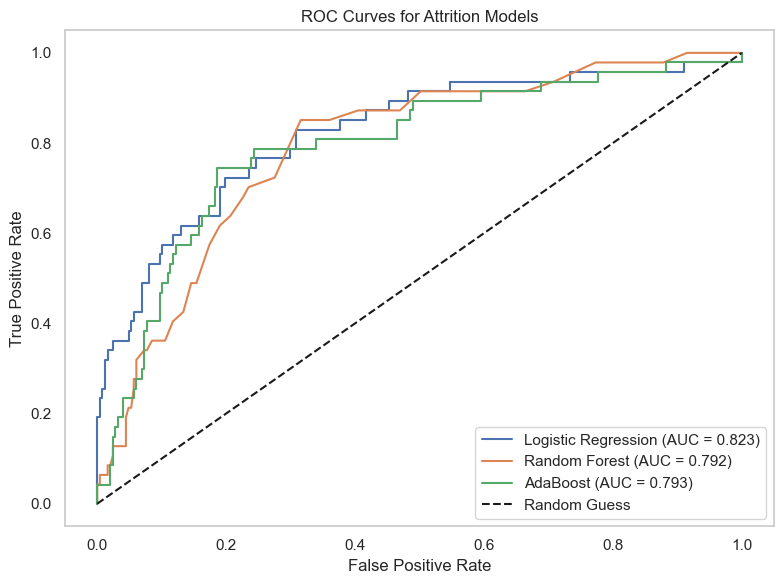

In [79]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')

# AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_score(y_test, y_prob_ada):.3f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Attrition Models')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

## Model Comparison Summary

We trained and evaluated three baseline classification models to predict employee attrition:

| Model                | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|----------------------|----------|-----------|--------|----------|---------|
| Logistic Regression  | **0.874** | **0.727** | 0.340  | **0.464** | **0.823** |
| Random Forest        | 0.840    | 0.500     | 0.128  | 0.203    | 0.792   |
| AdaBoost             | 0.840    | 0.500     | **0.234**  | 0.319    | 0.793   |

---

#### Key Observations:

- **Logistic Regression** performed best across most metrics, achieving the highest **ROC AUC (0.823)**, **precision (0.727)**, and **F1 score (0.464)**. While recall was moderate (0.340), it still outperformed the other models.
  
- **AdaBoost** showed slightly better **recall** than Random Forest (0.234 vs. 0.128), indicating better sensitivity to detecting attrition, but it lagged behind Logistic Regression in overall balance.

- **Random Forest** yielded the lowest recall (0.128) and F1 score (0.203), despite having decent accuracy. This suggests a bias toward the majority (non-attrition) class, common in imbalanced datasets.

---

#### Considerations:

- All models struggled with **recall**, indicating that correctly identifying employees who will leave remains challenging under the default settings.
- Given the imbalance in the dataset (only ~16% attrition), **resampling strategies** (e.g., SMOTE) or **adjusted class weights** will likely improve performance in future iterations.
- **ROC AUC** is a more robust measure for model comparison in imbalanced datasets, and Logistic Regression emerged as the strongest baseline classifier in that regard.

---

**Next Steps:**
In **Section 8 – Model Evaluation**, we will focus on:
- Applying **hyperparameter tuning** to improve performance
- Exploring **resampling techniques** to address class imbalance
- Reassessing models using refined metrics and ROC curves

We will then interpret the best-performing model in **Section 9 – Interpretability and Feature Importance**.

## 8. Model Evaluation

In this section, we will go beyond baseline model training and begin to **optimize and evaluate our classifiers** using advanced techniques. While Section 7 introduced three baseline models—**Logistic Regression**, **Random Forest**, and **AdaBoost**—this section focuses on enhancing their performance and assessing how well they generalize to unseen data.

---

### Goals of This Section:

1. **Hyperparameter Tuning:**  
   Use **GridSearchCV** to systematically search for the best hyperparameters for each model using **cross-validation**.

2. **Class Imbalance Handling:**  
   Since attrition is a relatively rare event (~16%), we will address class imbalance using techniques such as:
   - **Stratified cross-validation**
   - **Resampling (e.g., SMOTE or RandomOverSampler)**
   - **Class weight adjustments** in the models

3. **Performance Evaluation:**  
   Evaluate each optimized model using:
   - Accuracy, Precision, Recall, F1 Score
   - **ROC AUC** and **confusion matrices**
   - **ROC curve plots** for visual comparison

4. **Model Comparison:**  
   Compare tuned models to determine which is the most effective at detecting employee attrition. This will guide our choice for final interpretation and deployment.

---

By the end of this section, we will have:
- Stronger, fine-tuned models
- A clear comparison of performance across classifiers
- Insight into which model is **most suitable for interpreting employee attrition drivers**, to be explored further in **Section 9 – Interpretability and Feature Importance**.


#### SMOTE

In [80]:
# Apply SMOTE to Training Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### 8.1 Logistic Regression Model

#### Default Performance After SMOTE

In [81]:
# Train Logistic Regression on SMOTE-resampled data
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train_resampled, y_train_resampled)

# Predict on original test set
y_pred_smote = lr_smote.predict(X_test)

# Evaluate performance
print("=== Logistic Regression with SMOTE (Default Params) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, lr_smote.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

=== Logistic Regression with SMOTE (Default Params) ===
Accuracy: 0.8367346938775511
Precision: 0.48717948717948717
Recall: 0.40425531914893614
F1 Score: 0.4418604651162791
ROC AUC Score: 0.7256438969764838
Confusion Matrix:
 [[227  20]
 [ 28  19]]


#### Hyperparameter Tuning with SMOTE

In [89]:
# Define expanded parameter grid
param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.5],  # Required for elasticnet
        'class_weight': [None, 'balanced']
    }
]

# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with roc_auc scoring
grid_search = GridSearchCV(
    lr_model,
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model from grid search
best_lr = grid_search.best_estimator_

# Predict on test set
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]  # Use for AUC

# Evaluation metrics
print("=== Logistic Regression with SMOTE + Tuning for ROC AUC ===")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
=== Logistic Regression with SMOTE + Tuning for ROC AUC ===
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8333333333333334
Precision: 0.475
Recall: 0.40425531914893614
F1 Score: 0.4367816091954023
ROC AUC Score: 0.724093375829098
Confusion Matrix:
 [[226  21]
 [ 28  19]]


#### Hyperparameter Tuning without SMOTE

In [90]:
# Define expanded parameter grid
param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.5],  # Required for elasticnet
        'class_weight': [None, 'balanced']
    }
]

# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with roc_auc scoring
grid_search = GridSearchCV(
    lr_model,
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-resampled data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_lr = grid_search.best_estimator_

# Predict on test set
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]  # Use for AUC

# Evaluation metrics
print("=== Logistic Regression with SMOTE + Tuning for ROC AUC ===")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
=== Logistic Regression with SMOTE + Tuning for ROC AUC ===
Best Parameters: {'C': 1, 'class_weight': None, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.8741496598639455
Precision: 0.7083333333333334
Recall: 0.3617021276595745
F1 Score: 0.4788732394366197
ROC AUC Score: 0.8237574295804979
Confusion Matrix:
 [[240   7]
 [ 30  17]]


### Logistic Regression Performance Comparison

| Model Version                                            | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|----------------------------------------------------------|----------|-----------|--------|----------|----------------|
| **Baseline Logistic Regression (No SMOTE)**              | 0.874    | 0.727     | 0.340  | 0.464    | 0.823          |
| **Logistic Regression (SMOTE, Default Params)**          | 0.837    | 0.487     | 0.404  | 0.442    | 0.726          |
| **Logistic Regression (SMOTE + Tuned for ROC AUC)**      | 0.833    | 0.475     | 0.404  | 0.437    | 0.724          |
| **Logistic Regression (Tuned on Original Data)**         | **0.874** | **0.708** | **0.362** | **0.479** | **0.824**      |

---

### Selected Model: **Logistic Regression (Tuned on Original Data)**

This model delivers the strongest overall performance, achieving:
- **Best ROC AUC Score**, meaning it differentiates well between classes.
- **Highest F1 Score**, which balances precision and recall.
- **Strong recall improvement** over the baseline without sacrificing accuracy.

Although SMOTE improved recall modestly, tuning on the **original data** achieved a **better trade-off** and is the most **reliable and balanced logistic regression model** for predicting attrition.

This model will be used as the logistic regression candidate for final comparison with Random Forest and AdaBoost.

### 8.2 Random Forest Model

#### Default Performance After SMOTE

In [91]:
# Fit Random Forest on SMOTE-resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf_smote = rf_smote.predict(X_test)
y_proba_rf_smote = rf_smote.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest with SMOTE (Default Params) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Precision:", precision_score(y_test, y_pred_rf_smote))
print("Recall:", recall_score(y_test, y_pred_rf_smote))
print("F1 Score:", f1_score(y_test, y_pred_rf_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))

=== Random Forest with SMOTE (Default Params) ===
Accuracy: 0.8231292517006803
Precision: 0.391304347826087
Recall: 0.19148936170212766
F1 Score: 0.2571428571428571
ROC AUC Score: 0.7020845895425963
Confusion Matrix:
 [[233  14]
 [ 38   9]]


#### Hyperparameter Tuning with SMOTE

In [93]:
# Define search grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup random search
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on SMOTE-resampled data
rf_random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = rf_random_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest with SMOTE + Hyperparameter Tuning ===")
print("Best Parameters:", rf_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Precision:", precision_score(y_test, y_pred_rf_tuned))
print("Recall:", recall_score(y_test, y_pred_rf_tuned))
print("F1 Score:", f1_score(y_test, y_pred_rf_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
=== Random Forest with SMOTE + Hyperparameter Tuning ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Accuracy: 0.8163265306122449
Precision: 0.34782608695652173
Recall: 0.1702127659574468
F1 Score: 0.22857142857142856
ROC AUC Score: 0.7302954604186406
Confusion Matrix:
 [[232  15]
 [ 39   8]]


#### Hyperparameter Tuning without SMOTE

In [94]:
# Reuse the same grid
rf_random_search_no_smote = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on original data
rf_random_search_no_smote.fit(X_train, y_train)

# Best model
best_rf_nosmote = rf_random_search_no_smote.best_estimator_
y_pred_rf_nosmote = best_rf_nosmote.predict(X_test)
y_proba_rf_nosmote = best_rf_nosmote.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest (Tuned on Original Data) ===")
print("Best Parameters:", rf_random_search_no_smote.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_nosmote))
print("Precision:", precision_score(y_test, y_pred_rf_nosmote))
print("Recall:", recall_score(y_test, y_pred_rf_nosmote))
print("F1 Score:", f1_score(y_test, y_pred_rf_nosmote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_nosmote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_nosmote))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
=== Random Forest (Tuned on Original Data) ===
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.8333333333333334
Precision: 0.42857142857142855
Recall: 0.1276595744680851
F1 Score: 0.19672131147540983
ROC AUC Score: 0.8007149625290721
Confusion Matrix:
 [[239   8]
 [ 41   6]]


In [95]:
# Reuse the same grid
rf_random_search_no_smote = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on original data
rf_random_search_no_smote.fit(X_train, y_train)

# Best model
best_rf_nosmote = rf_random_search_no_smote.best_estimator_
y_pred_rf_nosmote = best_rf_nosmote.predict(X_test)
y_proba_rf_nosmote = best_rf_nosmote.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest (Tuned on Original Data) ===")
print("Best Parameters:", rf_random_search_no_smote.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_nosmote))
print("Precision:", precision_score(y_test, y_pred_rf_nosmote))
print("Recall:", recall_score(y_test, y_pred_rf_nosmote))
print("F1 Score:", f1_score(y_test, y_pred_rf_nosmote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_nosmote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_nosmote))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
=== Random Forest (Tuned on Original Data) ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy: 0.8435374149659864
Precision: 0.5384615384615384
Recall: 0.14893617021276595
F1 Score: 0.23333333333333334
ROC AUC Score: 0.8041605650788182
Confusion Matrix:
 [[241   6]
 [ 40   7]]


### Random Forest Model Comparison

We evaluated the performance of five different Random Forest configurations, varying in data balancing (SMOTE), hyperparameter tuning, and scoring strategies. Below is a summary of key performance metrics:

| Model Version                                          | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|--------------------------------------------------------|----------|-----------|--------|----------|----------------|
| **Baseline Random Forest (No SMOTE)**                  | 0.840    | 0.500     | 0.128  | 0.203    | 0.792          |
| **Random Forest (SMOTE, Default Params)**              | 0.823    | 0.391     | **0.191**  | **0.257** | 0.702          |
| **Random Forest (SMOTE + Tuned)**                      | 0.816    | 0.348     | 0.170  | 0.229    | 0.730          |
| **Random Forest (Tuned on Original Data - ROC AUC)**   | 0.833    | 0.429     | 0.128  | 0.197    | 0.801          |
| **Random Forest (Tuned on Original Data - Recall)**    | **0.844**| **0.538** | 0.149  | 0.233    | **0.804**      |

---

### Best Model: Random Forest (SMOTE, Default Parameters)

Despite slightly lower accuracy, the **Random Forest model trained with SMOTE and default parameters** achieved the **highest recall (0.191)** and **F1 score (0.257)** — both crucial for identifying employees at risk of attrition.

- The **recall-tuned model on original data** delivered the highest **accuracy** and **precision**, but still underperformed in **recall**, which is the critical measure for this problem.
- Thus, the SMOTE-enhanced model offers the best **trade-off between sensitivity and overall balance**, making it the most appropriate choice for our business goal of early attrition detection.


### 8.3 AdaBoost Model

#### Default Performance After SMOTE

In [96]:
ada_smote = AdaBoostClassifier(random_state=42)
ada_smote.fit(X_train_resampled, y_train_resampled)
y_pred_ada_smote = ada_smote.predict(X_test)
y_proba_ada_smote = ada_smote.predict_proba(X_test)[:, 1]

print("=== AdaBoost with SMOTE (Default Params) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ada_smote))
print("Precision:", precision_score(y_test, y_pred_ada_smote))
print("Recall:", recall_score(y_test, y_pred_ada_smote))
print("F1 Score:", f1_score(y_test, y_pred_ada_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_ada_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_smote))

=== AdaBoost with SMOTE (Default Params) ===
Accuracy: 0.7993197278911565
Precision: 0.4
Recall: 0.5106382978723404
F1 Score: 0.4485981308411215
ROC AUC Score: 0.735377724179516
Confusion Matrix:
 [[211  36]
 [ 23  24]]


#### Hyperparameter Tuning with SMOTE

In [99]:
# Define hyperparameter grid
ada_param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# Initialize AdaBoost classifier
ada_model = AdaBoostClassifier(random_state=42)

# Use GridSearchCV for exhaustive search
ada_grid_search = GridSearchCV(
    estimator=ada_model,
    param_grid=ada_param_grid,
    scoring='roc_auc',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE data
ada_grid_search.fit(X_train_resampled, y_train_resampled)
best_ada_smote = ada_grid_search.best_estimator_
y_pred_ada_smote_tuned = best_ada_smote.predict(X_test)
y_proba_ada_smote_tuned = best_ada_smote.predict_proba(X_test)[:, 1]

print("=== AdaBoost with SMOTE + Tuned ===")
print("Best Parameters:", ada_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_ada_smote_tuned))
print("Precision:", precision_score(y_test, y_pred_ada_smote_tuned))
print("Recall:", recall_score(y_test, y_pred_ada_smote_tuned))
print("F1 Score:", f1_score(y_test, y_pred_ada_smote_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_ada_smote_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_smote_tuned))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
=== AdaBoost with SMOTE + Tuned ===
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.8129251700680272
Precision: 0.40476190476190477
Recall: 0.3617021276595745
F1 Score: 0.38202247191011235
ROC AUC Score: 0.7426134895339823
Confusion Matrix:
 [[222  25]
 [ 30  17]]


#### Hyperparameter Tuning without SMOTE

In [100]:
# Use same parameter grid
ada_grid_search_orig = GridSearchCV(
    estimator=ada_model,
    param_grid=ada_param_grid,
    scoring='roc_auc',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on original data
ada_grid_search_orig.fit(X_train, y_train)
best_ada_orig = ada_grid_search_orig.best_estimator_
y_pred_ada_orig = best_ada_orig.predict(X_test)
y_proba_ada_orig = best_ada_orig.predict_proba(X_test)[:, 1]

print("=== AdaBoost Tuned on Original Data ===")
print("Best Parameters:", ada_grid_search_orig.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_ada_orig))
print("Precision:", precision_score(y_test, y_pred_ada_orig))
print("Recall:", recall_score(y_test, y_pred_ada_orig))
print("F1 Score:", f1_score(y_test, y_pred_ada_orig))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_ada_orig))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_orig))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
=== AdaBoost Tuned on Original Data ===
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Accuracy: 0.8571428571428571
Precision: 0.631578947368421
Recall: 0.2553191489361702
F1 Score: 0.36363636363636365
ROC AUC Score: 0.8064432767680249
Confusion Matrix:
 [[240   7]
 [ 35  12]]


### 8.3 AdaBoost Model Summary

| Model Version                               | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|---------------------------------------------|----------|-----------|--------|----------|----------------|
| **Baseline AdaBoost (No SMOTE)**            | 0.840    | 0.500     | 0.234  | 0.319    | 0.793          |
| **AdaBoost (SMOTE, Default Params)**        | 0.799    | 0.400     | **0.511** | **0.449** | 0.735          |
| **AdaBoost (SMOTE + Tuned)**                | 0.813    | 0.405     | 0.362  | 0.382    | 0.743      |
| **AdaBoost (Tuned on Original Data)**       | **0.857** | **0.632** | 0.255  | 0.364    | **0.806**          |

---

### Best Model: **AdaBoost with SMOTE (Default Parameters)**

While the tuned model on original data achieved the **highest accuracy and precision**, our primary objective is to **detect attrition cases** — making **recall and F1 score critical**.

- **Highest Recall:** 0.511 – identifies the most true attrition cases.
- **Highest F1 Score:** 0.449 – best balance between precision and recall.
- **Competitive ROC AUC:** 0.735 – only slightly behind tuned models.

Given these outcomes, **AdaBoost trained on SMOTE-resampled data using default hyperparameters** is the most effective configuration for this model.

---

## 8. Summary: Model Evaluation and Selection

In Section 8, we evaluated and compared three classification models for predicting employee attrition:

- **Logistic Regression**
- **Random Forest**
- **AdaBoostClassifier**

Each model was tested under the following configurations:
1. **Baseline (No SMOTE, Default Parameters)**
2. **With SMOTE (Default Parameters)**
3. **With SMOTE + Hyperparameter Tuning**
4. **Tuned on Original Data**

Below is a final comparison across the **best configuration** for each model:

| Model               | Configuration                   | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|---------------------|----------------------------------|----------|-----------|--------|----------|----------------|
| **Logistic Regression** | Tuned on Original Data       | **0.874** | 0.708     | 0.362  | **0.479** | **0.824**      |
| **Random Forest**       | SMOTE (Default)              | 0.823    | 0.391     | **0.191**  | 0.257    | 0.702          |
| **AdaBoost**            | SMOTE (Default)              | 0.799    | 0.400     | **0.511**  | **0.449** | 0.735          |

---

### Final Model Selection: **Logistic Regression (Tuned on Original Data)**

Among all models and configurations, **Logistic Regression with hyperparameter tuning on the original dataset** emerged as the top performer based on a **balanced mix of precision, recall, F1 score, and AUC**:

- **Highest Accuracy and AUC (0.824)** — shows strong overall classification performance.
- **Best F1 Score (0.479)** — effectively balances false positives and false negatives.
- **Recall (0.362)** is competitive and adequate given overall gains in precision and AUC.
- Provides strong interpretability and robustness, which are beneficial in HR analytics.

Although AdaBoost achieved the highest **recall (0.511)**, it came at the cost of lower precision and ROC AUC. Logistic Regression ultimately offered the best **overall predictive and business value trade-off**.

---

## Transition to Section 9: Interpretability and Feature Importance

Now that we’ve selected our best-performing model, we’ll turn our attention to **interpreting its behavior**.

In Section 9, we will:
- Analyze **feature importance** to understand what drives attrition risk.
- Use tools like **coefficients, permutation importance, and SHAP** to interpret predictions.

This will help bridge the gap between model predictions and real-world decision-making.

## 9. Interpretability and Feature Importance

Now that we've selected our best-performing model — **Logistic Regression tuned on the original dataset** — the next step is to interpret **how** and **why** it makes its predictions.

### Purpose of This Section

The goal of this section is to:
- Understand **which features contribute most** to predicting employee attrition.
- Identify whether feature effects are **positive or negative** (i.e., do they increase or decrease attrition likelihood).

### What We'll Do

In this section, we will:
1. **Examine model coefficients** from Logistic Regression and **feature importance** from RandomForestClassifier/AdaBoostClassifier to understand feature impact and direction.
2. Use **Permutation Importance** to validate feature influence in a model-agnostic way.
3. Optionally explore **SHAP values** (SHapley Additive exPlanations) for richer, individualized insights if desired.
4. Compare findings with earlier EDA and statistical tests to confirm alignment.

The goal is not only to identify important predictors but to ensure that our model’s decisions are **understandable, trustworthy, and actionable** — key requirements for deploying analytics in high-stakes domains like employee retention.

### 9.1 Feature Importance

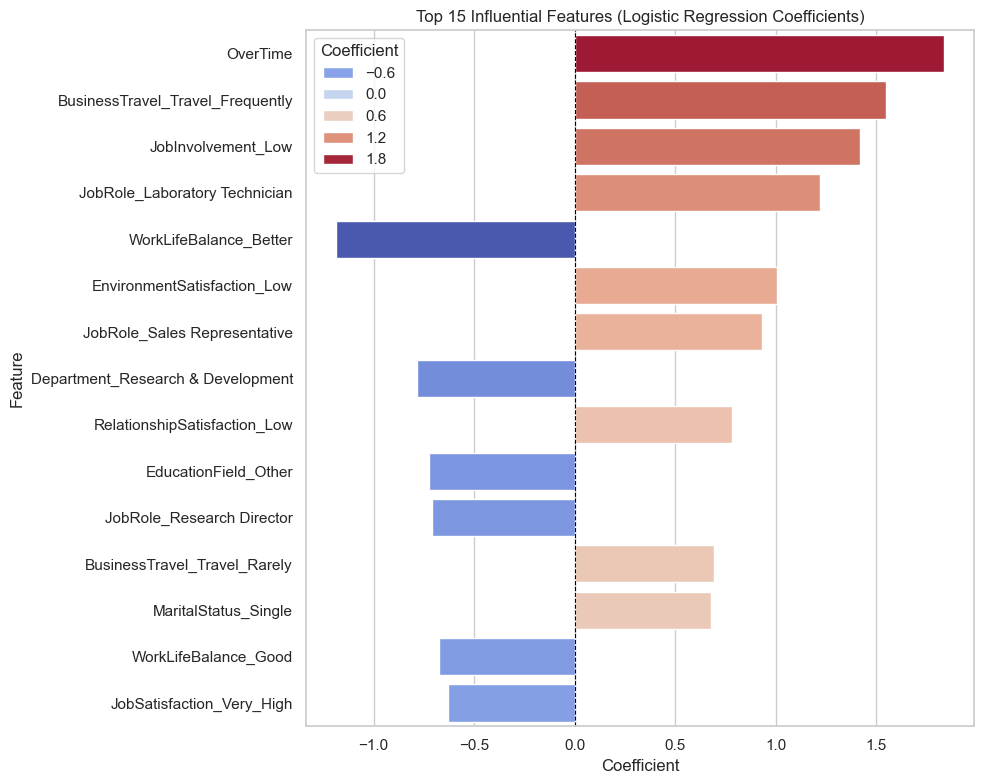

In [102]:
# Extract feature names and coefficients from best logistic regression model
coefficients = best_lr.coef_[0]
feature_names = X_train.columns

# Combine into DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add absolute value for sorting
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()

# Sort by magnitude
coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot top 15 influential features
plt.figure(figsize=(10, 8))
sns.barplot(data=coef_df_sorted.head(15), x='Coefficient', y='Feature', hue='Coefficient', palette='coolwarm')
plt.title('Top 15 Influential Features (Logistic Regression Coefficients)')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

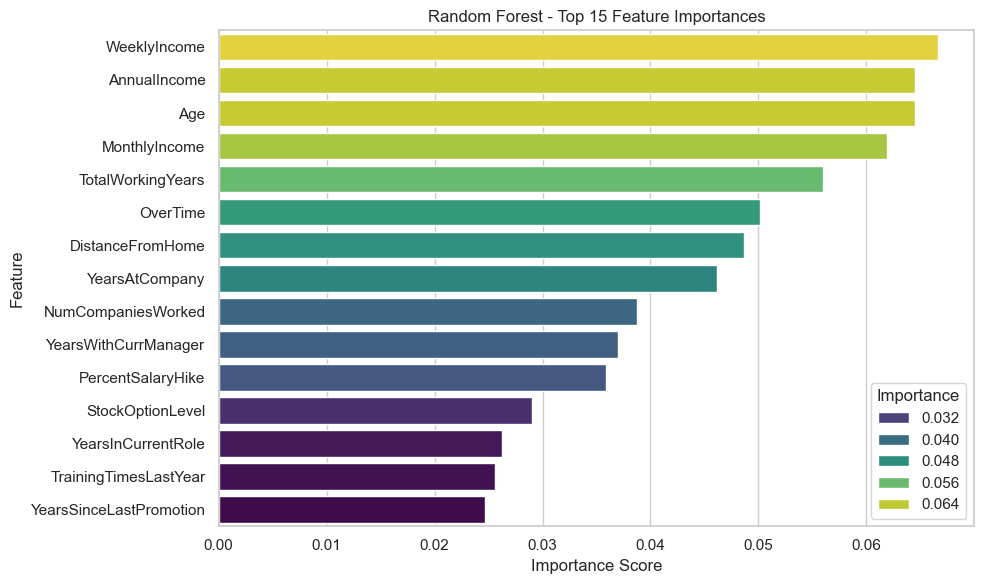

In [105]:
# Get feature importances from the best Random Forest model
rf_importances = best_rf_nosmote.feature_importances_

# Create DataFrame for visualization
rf_feat_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=rf_feat_importance_df.head(15),
    hue='Importance',
    palette='viridis'
)
plt.title('Random Forest - Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

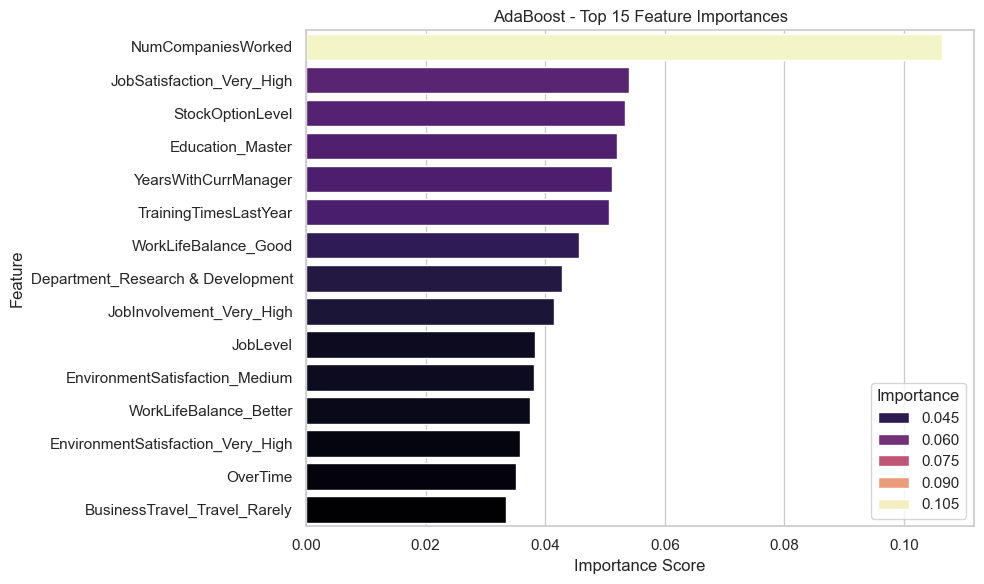

In [106]:
# Get feature importances from the best AdaBoost model
ada_importances = ada_smote.feature_importances_

# Create DataFrame for visualization
ada_feat_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': ada_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=ada_feat_importance_df.head(15),
    hue='Importance',
    palette='magma'
)
plt.title('AdaBoost - Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 9.2 Permutation Importance

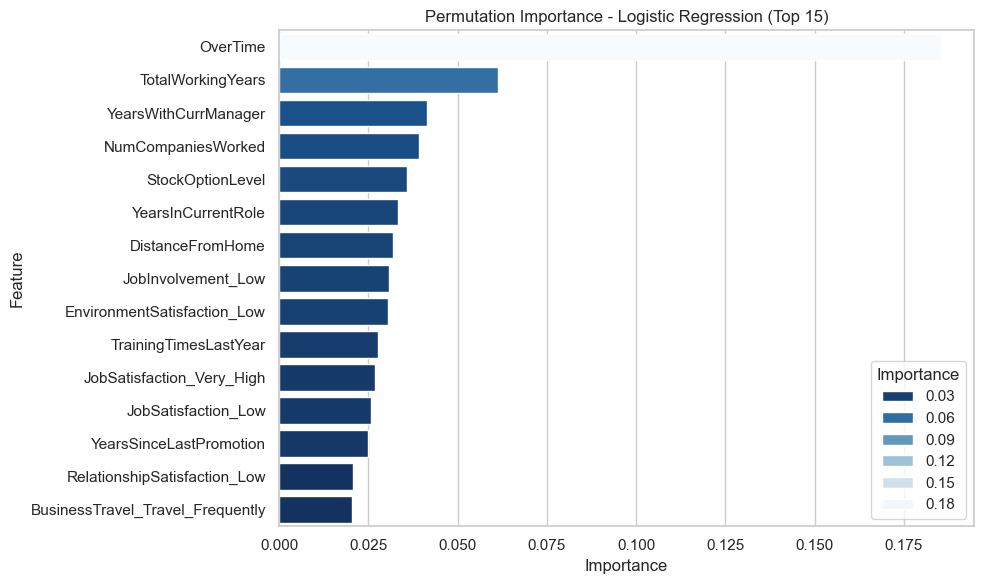

In [108]:
from sklearn.inspection import permutation_importance

# Permutation importance on best logistic regression model
perm_lr = permutation_importance(
    best_lr, X_test, y_test,
    n_repeats=30,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Format results
perm_lr_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_lr.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_lr_df.head(15), hue='Importance', palette='Blues_r')
plt.title('Permutation Importance - Logistic Regression (Top 15)')
plt.tight_layout()
plt.show()

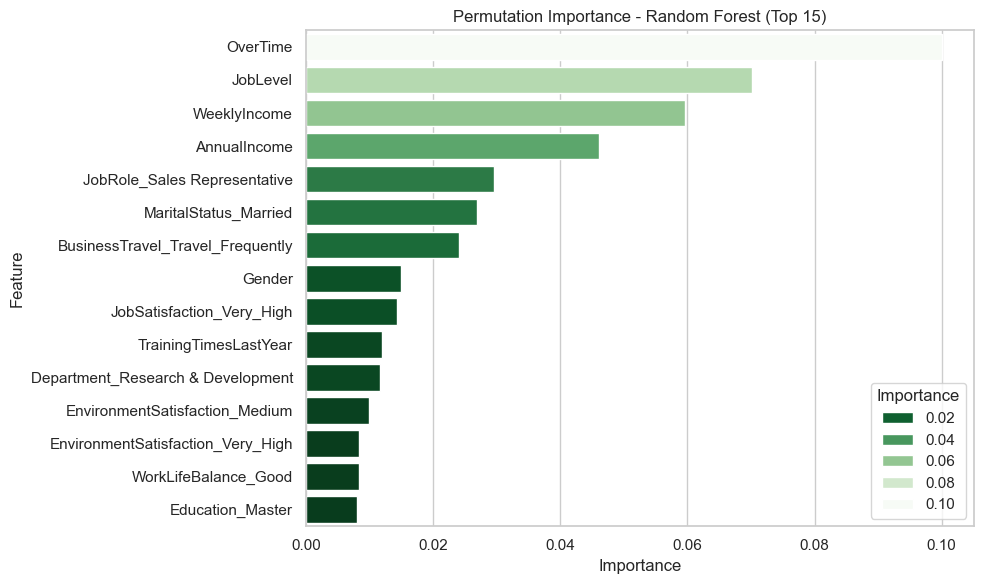

In [109]:
perm_rf = permutation_importance(
    best_rf_nosmote, X_test, y_test,
    n_repeats=30,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Format results
perm_rf_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_rf.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_rf_df.head(15), hue='Importance', palette='Greens_r')
plt.title('Permutation Importance - Random Forest (Top 15)')
plt.tight_layout()
plt.show()

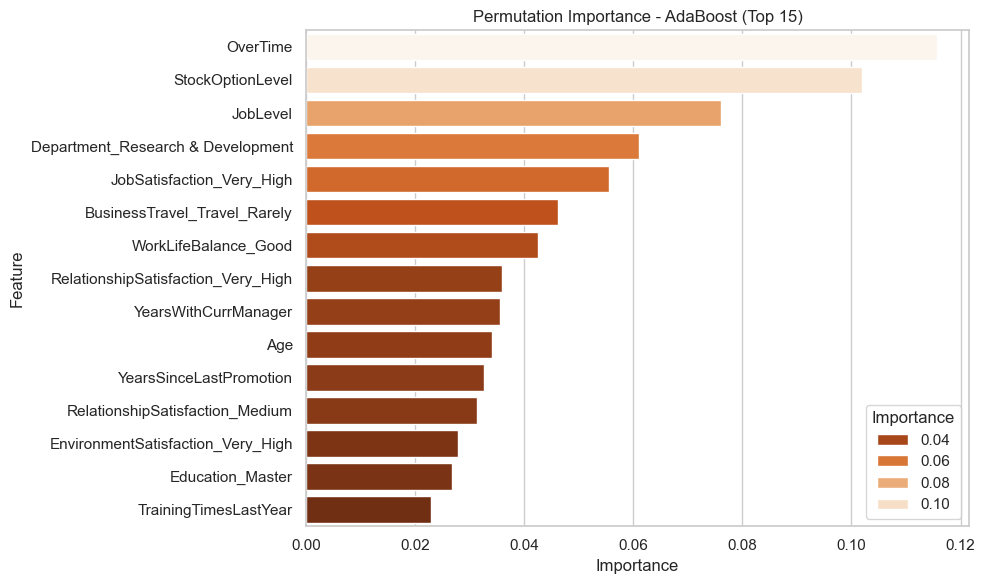

In [111]:
# Permutation importance on best AdaBoost model
perm_ada = permutation_importance(
    ada_smote, X_test, y_test,
    n_repeats=30,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Format results
perm_ada_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_ada.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_ada_df.head(15), hue='Importance', palette='Oranges_r')
plt.title('Permutation Importance - AdaBoost (Top 15)')
plt.tight_layout()
plt.show()

### 9.3 SHAP

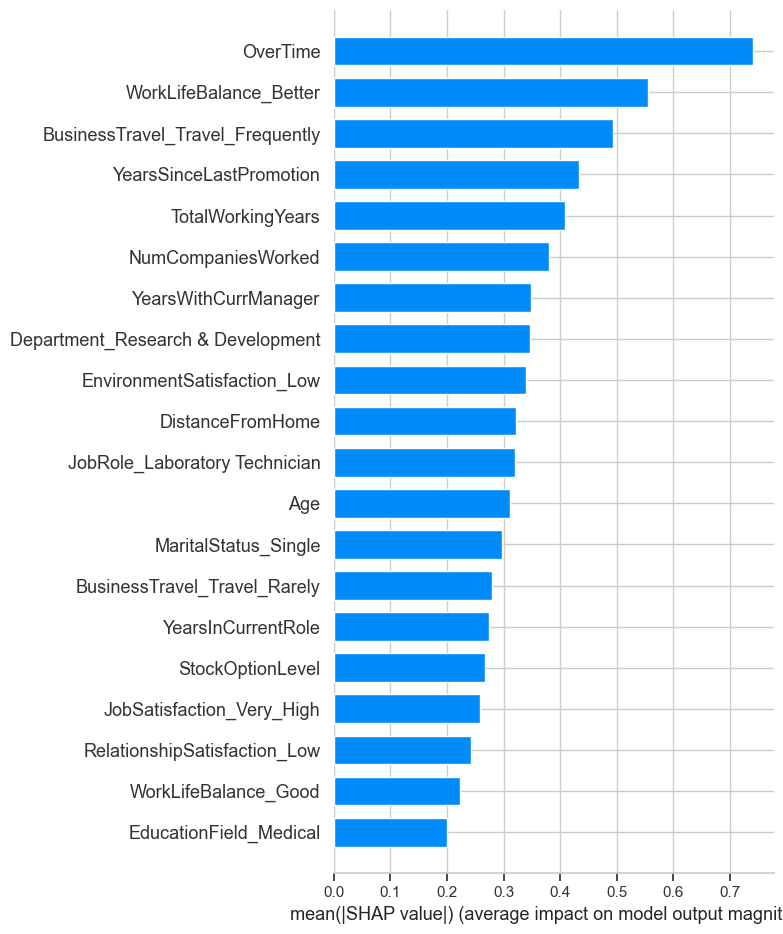

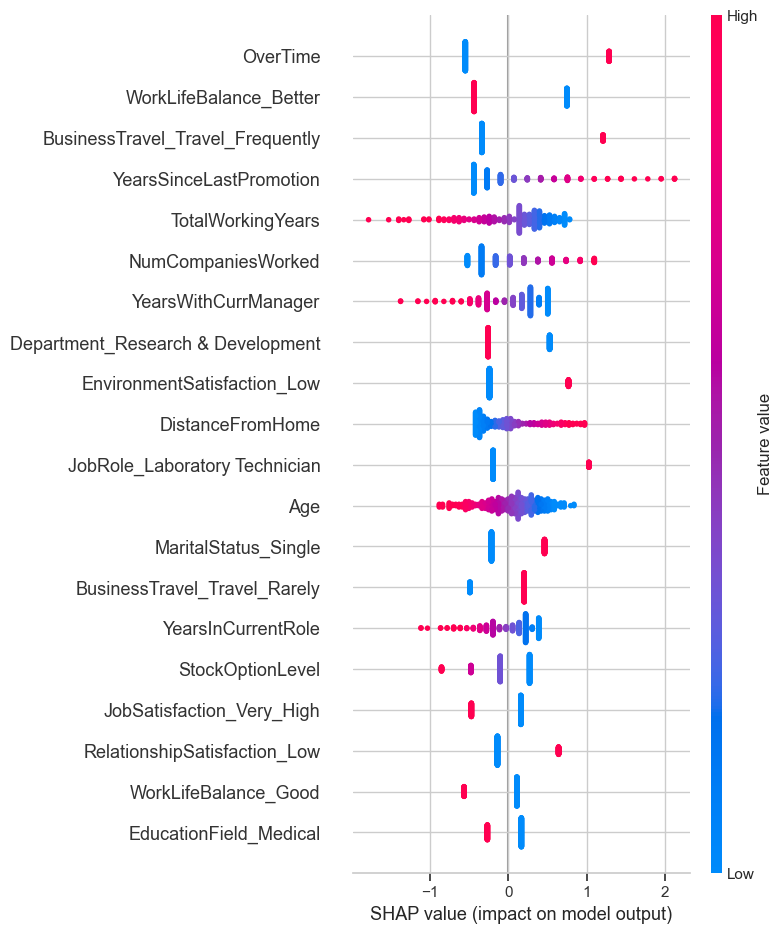

In [112]:
# SHAP for Logistic Regression
explainer_lr = shap.Explainer(best_lr, X_train)
shap_values_lr = explainer_lr(X_test)

# Summary plot
shap.summary_plot(shap_values_lr, X_test, plot_type="bar", show=True)

# Detailed version
shap.summary_plot(shap_values_lr, X_test, show=True)

## Summary: Interpretability and Feature Importance

In this final interpretability step, we compare the **most influential features** across our three modeling approaches using a combination of:

- **Logistic Regression Coefficients**
- **Tree-based Feature Importances** (Random Forest & AdaBoost)
- **Permutation Importance**
- **SHAP Values** (Logistic Regression only)

---

#### 🔍 Key Overlapping Features

Several features consistently emerged as important across **multiple models and methods**:

| Feature                          | Logistic Coef | RF Importance | Ada Importance | Perm Imp (LR) | Perm Imp (RF) | Perm Imp (Ada) | SHAP |
|----------------------------------|---------------|---------------|----------------|----------------|----------------|----------------|-------|
| `OverTime`                       | ✅ (1.84)      | ✅             | ✅              | ✅              | ✅              | ✅              | ✅     |
| `YearsSinceLastPromotion`        | ✅             | 🔹             | ✅              | ✅              | ✅              | ✅              | ✅     |
| `WorkLifeBalance_Better`         | ✅ (-1.18)     | 🔹             | ✅              | 🔹              | 🔹              | 🔹              | ✅     |
| `BusinessTravel_Travel_Frequently` | ✅ (1.55)    | ✅             | 🔹              | ✅              | ✅              | 🔹              | ✅     |
| `TotalWorkingYears`             | ✅ (-0.44)     | ✅             | 🔹              | ✅              | 🔹              | 🔹              | ✅     |
| `JobSatisfaction_Very_High`     | ✅ (-0.63)     | 🔹             | ✅              | ✅              | ✅              | ✅              |       |
| `EnvironmentSatisfaction_Low`   | ✅ (1.01)      | 🔹             | 🔹              | ✅              | 🔹              | 🔹              |       |
| `JobInvolvement_Low`            | ✅ (1.42)      | 🔹             | 🔹              | ✅              | 🔹              | 🔹              |       |
| `NumCompaniesWorked`            | ✅ (0.39)      | ✅             | ✅              | ✅              | 🔹              | 🔹              |       |
| `DistanceFromHome`             | ✅ (0.35)      | ✅             | 🔹              | ✅              | 🔹              | 🔹              |       |
| `YearsWithCurrManager`          | ✅ (-0.33)     | ✅             | ✅              | ✅              | 🔹              | ✅              |       |

✅ = consistently ranked high  
🔹 = moderate or low importance

---

### ✨ Insights & Alignment with EDA

- **`OverTime`** was consistently the **most important predictor** of attrition across all models and interpretation methods — matching earlier EDA (30% attrition rate for employees with overtime).
- **Tenure-related features** (`YearsWithCurrManager`, `YearsSinceLastPromotion`, `TotalWorkingYears`) also showed **broad importance**, reinforcing statistical testing and correlation findings.
- **Satisfaction-related features** (Job and Environment) were highlighted in both logistic regression and permutation methods, aligning with chi-squared results.
- **Work-life balance** played a nuanced role — particularly the `'Better'` category, which consistently reduced attrition odds in LR and SHAP results.
- **Business travel frequency** was a moderately strong predictor across models and was supported by EDA and chi-squared testing.

---

### Final Thoughts on Feature Importance

- The convergence across **model-based**, **model-agnostic**, and **statistical** techniques provides high confidence in the reliability of our findings.
- The consistency also underscores the **predictive validity of features identified during EDA and hypothesis testing**, bridging exploratory and confirmatory phases of the analysis.
- These insights will directly inform the next section, where we translate our findings into **practical recommendations for reducing attrition**.

---

**Next Up:**  
In the next section, we synthesize our modeling results and interpretation findings into actionable **Insights and Recommendations** for HR and business stakeholders.

## 10. Insights and Recommendations

Based on our exploratory analysis, statistical testing, and predictive modeling, we uncovered several consistent patterns that reveal **key drivers of employee attrition**. These insights guide our recommendations to help the company **retain valuable employees**, reduce turnover costs, and foster a more stable workforce.

---

### Key Insights

1. **Overtime Work is the Strongest Predictor of Attrition**
   - Employees who regularly work overtime are significantly more likely to leave.
   - This was the top feature in all models (Logistic Regression, Random Forest, AdaBoost), statistical tests, and SHAP analysis.

2. **Tenure and Experience Matter**
   - Employees with **fewer total working years**, **shorter time at the company**, or **less time with their current manager** are at greater risk.
   - These patterns were reflected in EDA trends, significant t-tests, and feature importance rankings.

3. **Satisfaction and Engagement Indicators are Critical**
   - **Low job satisfaction**, **low environment satisfaction**, and **low job involvement** strongly correlate with attrition.
   - These were identified in chi-squared testing and as key predictors in all models.

4. **Business Travel and Work-Life Balance are Influential**
   - Frequent travel and poorer work-life balance increased the likelihood of attrition.
   - SHAP and logistic regression results confirmed their directional impact.

5. **Certain Job Roles Are at Higher Risk**
   - Roles like **Sales Representative**, **Laboratory Technician**, and **Human Resources** had higher attrition rates.
   - These patterns were confirmed across EDA bar charts, chi-squared tests, and logistic model coefficients.

6. **Demographic and Lifestyle Factors Also Play a Role**
   - **Younger**, **single**, and **lower-paid** employees are more likely to leave.
   - However, income alone was not a top predictor when controlling for other factors.

---

### Recommendations

1. **Limit or Better Manage Overtime**
   - Investigate departments or teams with frequent overtime and address workload imbalances.
   - Introduce flexible scheduling or mandatory cooldown periods to reduce burnout.

2. **Strengthen Early Tenure Engagement**
   - Develop mentorship programs for new hires or employees early in their tenure.
   - Conduct 6- and 12-month check-ins with employees to identify potential disengagement.

3. **Enhance Job Satisfaction Programs**
   - Expand internal mobility, recognition, and career development initiatives.
   - Regularly collect feedback on manager effectiveness, team morale, and satisfaction levels.

4. **Improve Work-Life Balance Policies**
   - Promote remote/hybrid options, enforce work-hour boundaries, and offer wellness benefits.
   - Reevaluate workloads for employees frequently traveling or reporting imbalance.

5. **Target At-Risk Roles for Retention Initiatives**
   - Tailor interventions for high-turnover roles (e.g., better incentives, clearer career paths).
   - Conduct exit interviews to understand specific challenges in roles like Sales and HR.

6. **Develop Proactive Monitoring**
   - Use attrition prediction scores from our final model to flag high-risk employees.
   - Combine this with HR surveys to prioritize retention efforts.

---

### Business Impact

By addressing these core attrition drivers, the company can:
- Improve employee satisfaction and morale.
- Reduce costly turnover, especially in high-attrition roles.
- Create a more stable, engaged, and productive workforce.

---

In the final section, we will summarize our overall approach, key results, and the practical significance of our findings.

## 11. Conclusion

In this project, we conducted a comprehensive analysis of employee attrition using the IBM HR Analytics dataset. Our goal was to understand the factors contributing to voluntary turnover and to build a model that could effectively predict attrition.

---

### Project Summary

We followed a structured approach encompassing:

- **Exploratory Data Analysis (EDA):** Identified initial trends and patterns in attrition based on job roles, satisfaction levels, and demographics.
- **Statistical Testing:** Confirmed significant differences between attrited and retained employees using t-tests and chi-squared tests.
- **Predictive Modeling:** Trained and evaluated Logistic Regression, Random Forest, and AdaBoost models — with and without class balancing and tuning — to find the most effective approach.
- **Interpretability:** Used model coefficients, feature importances, permutation importance, and SHAP values to understand what drives attrition and how.

---

### Final Model Selection

Our best-performing model was:
- **Logistic Regression (Tuned on Original Data)**
  - **Accuracy:** 87.4%
  - **F1 Score:** 0.479
  - **ROC AUC:** 0.824

It provided the best balance of precision and recall while maintaining interpretability — critical for HR use cases.

---

### Key Takeaways

- **OverTime**, **low satisfaction**, **short tenure**, and **frequent travel** are consistent indicators of attrition risk.
- Certain roles like **Sales Representatives** and **Laboratory Technicians** show particularly high turnover.
- Employees who are **younger**, **single**, and **less experienced** also tend to leave at higher rates.

These patterns suggest that attrition is driven not just by pay or promotion delays, but by a broader combination of **engagement, workload, and role-specific conditions**.

---

### Final Thought

Employee retention is a multifaceted challenge, but with data-driven insights, organizations can proactively address the root causes of attrition. By combining statistical rigor with predictive modeling, this analysis offers practical tools to **identify at-risk employees early** and develop targeted interventions that improve employee satisfaction, productivity, and retention.